In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv('/kaggle/input/gujarat-real-estate-project-registered-2017-2022/Projects by Price All.csv')

# Display column names
print(df.columns)

# Display basic information about the dataset
print(df.info())
print(df.describe())

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

Index(['projectID', 'projectType', 'projectStatus', 'startDate', 'endDate',
       'DateID', 'districtname', 'subdistrictname', 'centroid', 'address',
       'projectName', 'no_units', 'projectcost', 'regFee',
       'sum_unitConsideration'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14267 entries, 0 to 14266
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   projectID              14267 non-null  int64  
 1   projectType            14267 non-null  object 
 2   projectStatus          13765 non-null  object 
 3   startDate              13765 non-null  object 
 4   endDate                13765 non-null  object 
 5   DateID                 14267 non-null  object 
 6   districtname           13761 non-null  object 
 7   subdistrictname        13760 non-null  object 
 8   centroid               13761 non-null  object 
 9   address                13688 non-null  object 
 1

## Dataset Overview

The dataset contains 15 columns with various data types, including integer, float, datetime, and object types.

### Summary Statistics

- **Project ID:** Ranges from 12 to 23945 with a mean of 10844.68.
- **Start Date:** The mean start date is 2019-07-29, with a minimum of 2005-04-01 and a maximum of 2024-04-09.
- **End Date:** The mean end date is 2024-01-30, with a minimum of 2017-09-30 and a maximum of 2036-06-30.
- **Project Cost:** The mean cost is approximately 318.91 million with a range from 300,000 to 27.69 billion.
- **Number of Units:** The mean is 120 units, ranging from 1 to 4798.
- **Reg Fee:** The mean registration fee is approximately 94,026.32 with a range from 0 to 2,798,010.
- **Sum Unit Consideration:** The mean is approximately 375.79 million with a range from 0 to 28.58 billion.

### Missing Values

- **projectStatus:** 502 missing values
- **startDate:** 502 missing values
- **endDate:** 502 missing values
- **districtname:** 506 missing values
- **subdistrictname:** 507 missing values
- **centroid:** 506 missing values
- **address:** 579 missing values
- **projectcost:** 559 missing values
- **no_units:** 94 missing values
- **sum_unitConsideration:** 94 missing values
- **regFee:** 502 missing values


In [2]:
# Example: Consolidating city names

# Step 1: Create a mapping dictionary for the city names
city_name_mapping = {
    'Ahmedabad': 'Ahmedabad',
    'Ahmedabad City': 'Ahmedabad',
    'Ahmedabad (East)': 'Ahmedabad',
    'Ahmedabad (West)': 'Ahmedabad',
    'Amdavad': 'Ahmedabad',
    'Surat City':'Surat',
    # Add other cities and their variations as needed
}

# Step 2: Replace the city names in the dataframe using the mapping dictionary
df['districtname'] = df['districtname'].replace(city_name_mapping)
df['subdistrictname'] = df['subdistrictname'].replace(city_name_mapping)

# Step 3: Verify the changes
print(df['districtname'].value_counts())
print(df['subdistrictname'].value_counts())


districtname
Ahmedabad         4287
Vadodara          2499
Surat             1878
Rajkot            1633
Gandhinagar       1288
Bhavnagar          498
Valsad             299
Anand              269
Junagadh           196
Jamnagar           166
Bharuch            161
Mehsana            154
Navsari             99
Kutch               69
Banaskantha         64
Kheda               58
Patan               28
Surendranagar       19
Gir Somnath         18
Sabar Kantha        18
Porbandar           15
Aravalli            13
Tapi                 8
Panchmahals          7
Morbi                7
Amreli               2
Mahisagar            2
Dahod                1
Daskroi              1
Choryasi             1
Ahmedabad            1
Sabarkantha          1
Chhota Udaipur       1
Name: count, dtype: int64
subdistrictname
Ahmedabad      3555
Vadodara       2363
Rajkot         1584
Surat          1404
Gandhinagar    1122
               ... 
Wankaner          1
Talala            1
Songadh           1
Lathi 

In [3]:
print(df['centroid'].head())
print(df['centroid'].value_counts().head())

0    [23.049188524390686, 72.47692463660485]
1    [22.938832464592085, 72.57351856951846]
2      [21.111813209381637, 73.390583684548]
3    [23.139234286581893, 72.54019426011848]
4     [23.05127005540579, 72.47888312816849]
Name: centroid, dtype: object
centroid
[21.716471745895994, 72.12897351429841]    2
[21.12961638, 72.80486778]                 2
[22.689941, 73.11996696666667]             2
[22.52945265, 72.96082861666667]           2
[23.049188524390686, 72.47692463660485]    1
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14267 entries, 0 to 14266
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   projectID              14267 non-null  int64         
 1   projectType            14267 non-null  object        
 2   projectStatus          13765 non-null  object        
 3   startDate              13765 non-null  datetime64[ns]
 4   endDate                13765 non-null  datetime64[ns]
 5   DateID                 14267 non-null  datetime64[ns]
 6   districtname           13761 non-null  object        
 7   subdistrictname        13760 non-null  object        
 8   centroid               13761 non-null  object        
 9   address                13688 non-null  object        
 10  projectName            14267 non-null  object        
 11  no_units               14173 non-null  float64       
 12  projectcost            13708 non-null  float64       
 13  r

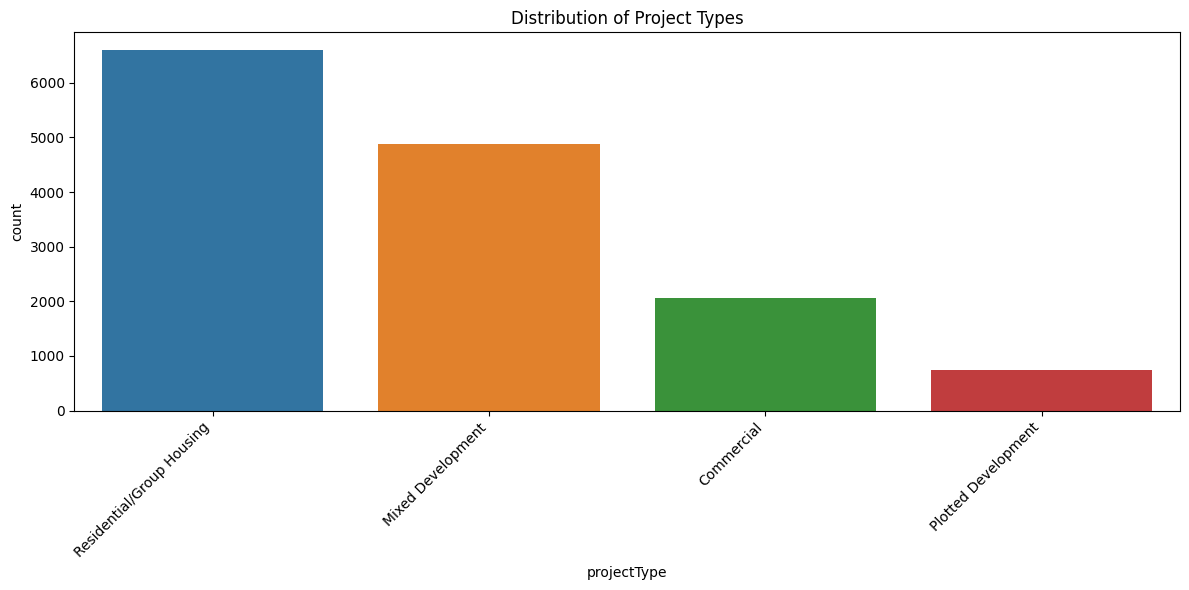

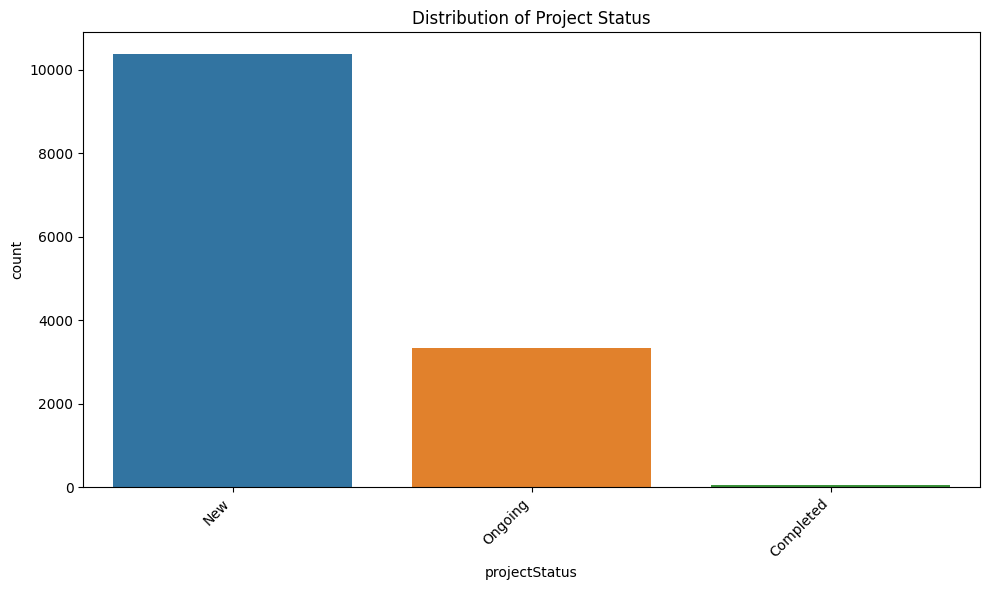

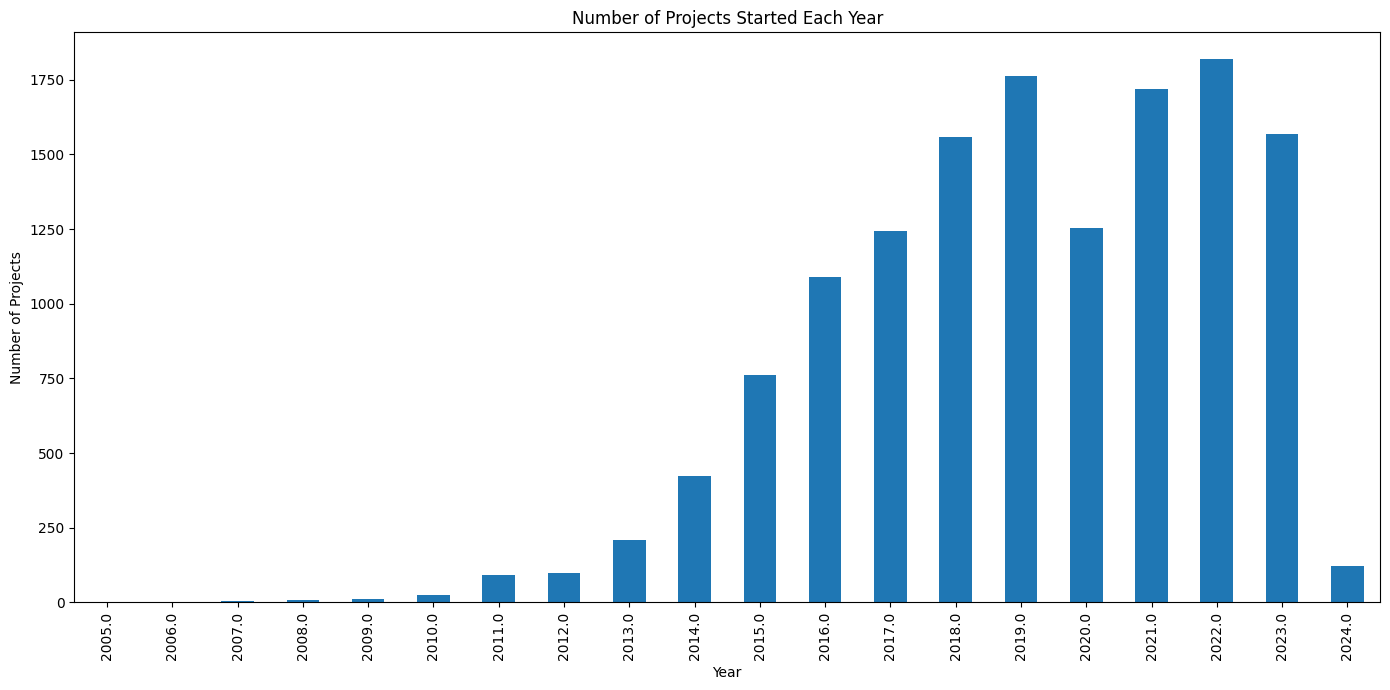

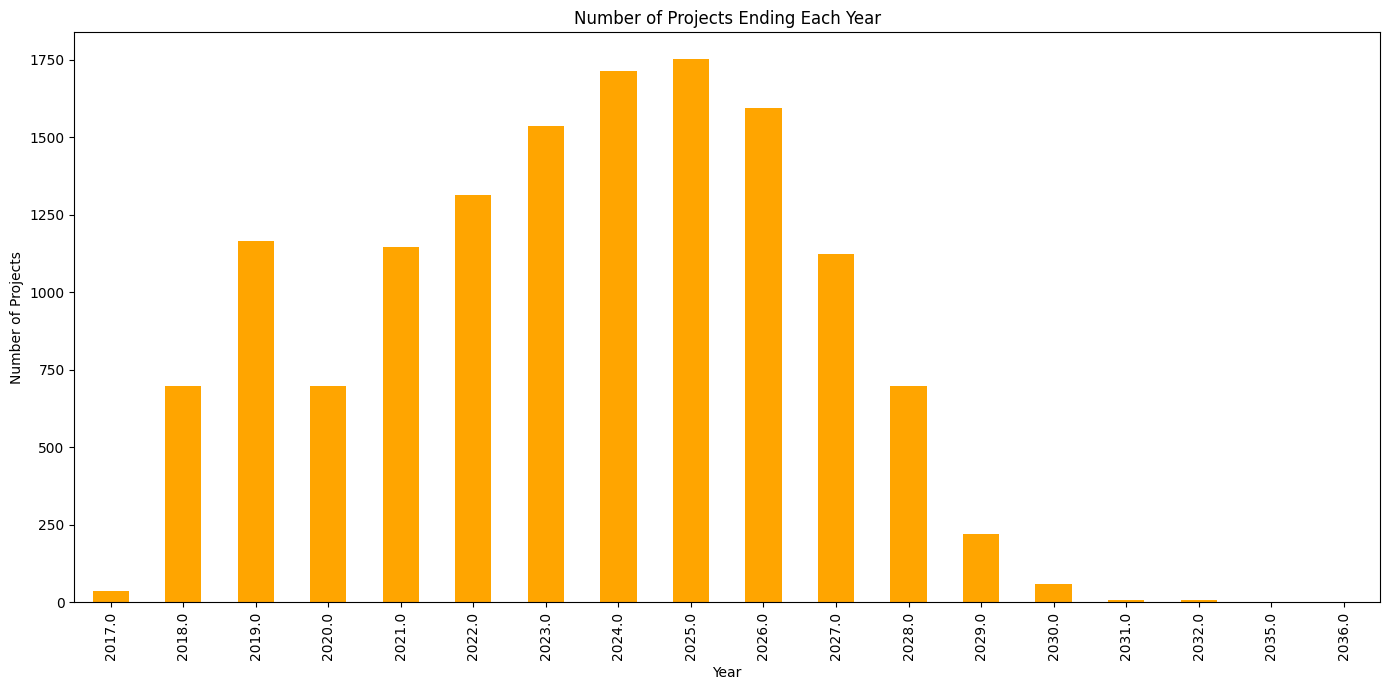

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


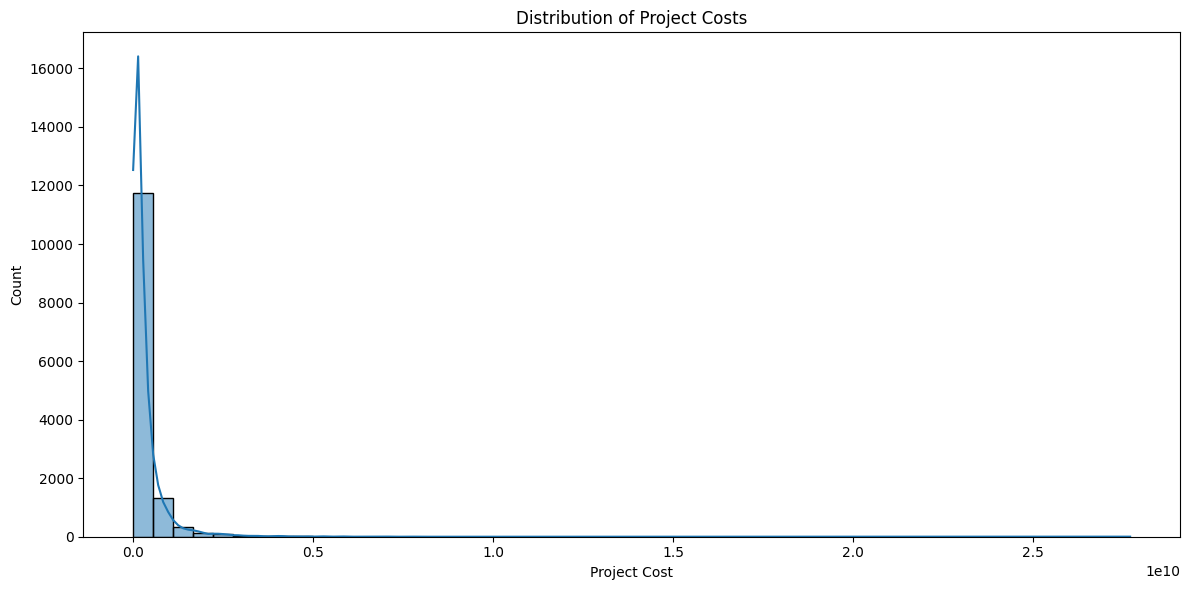

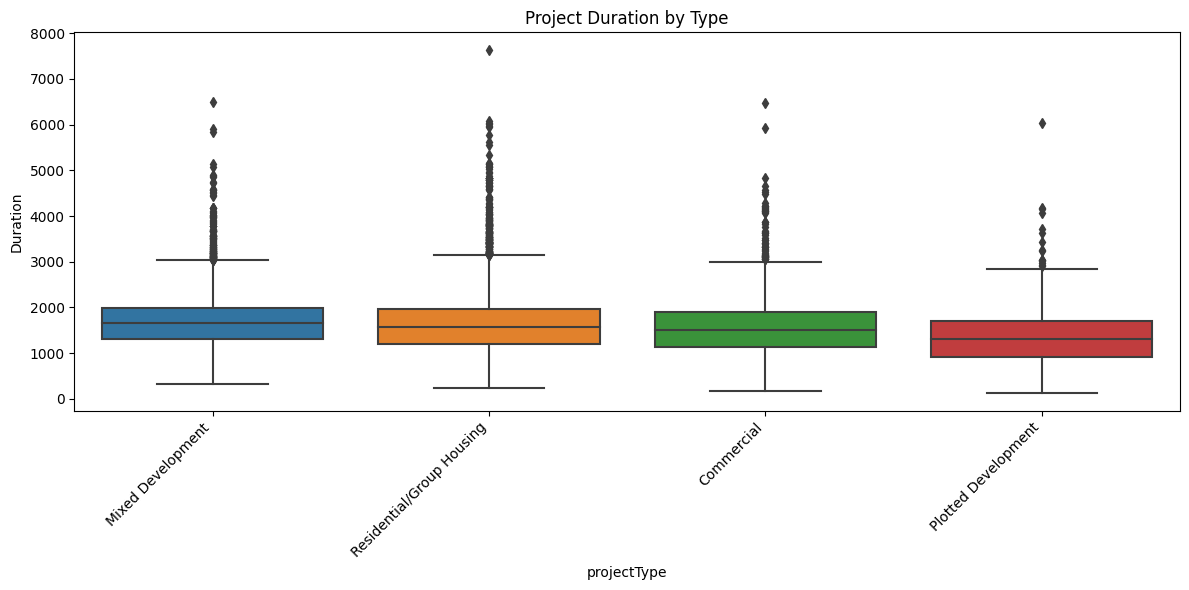

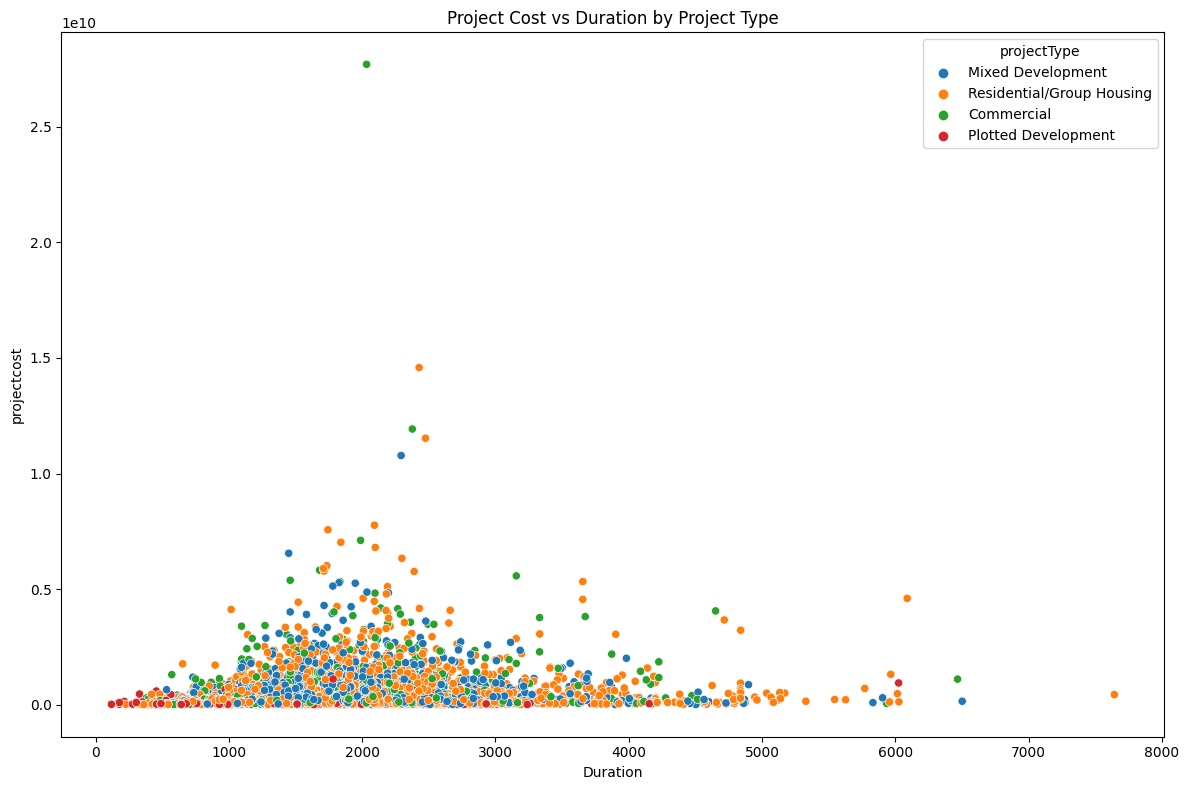

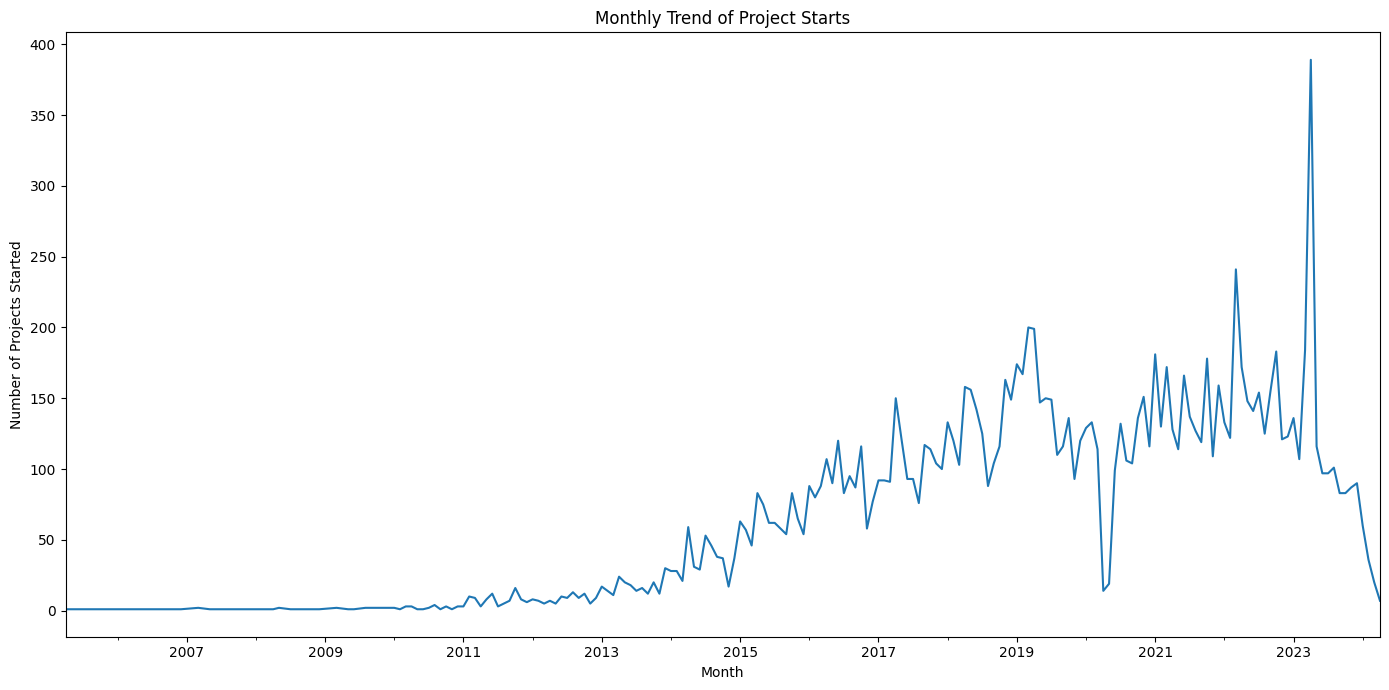

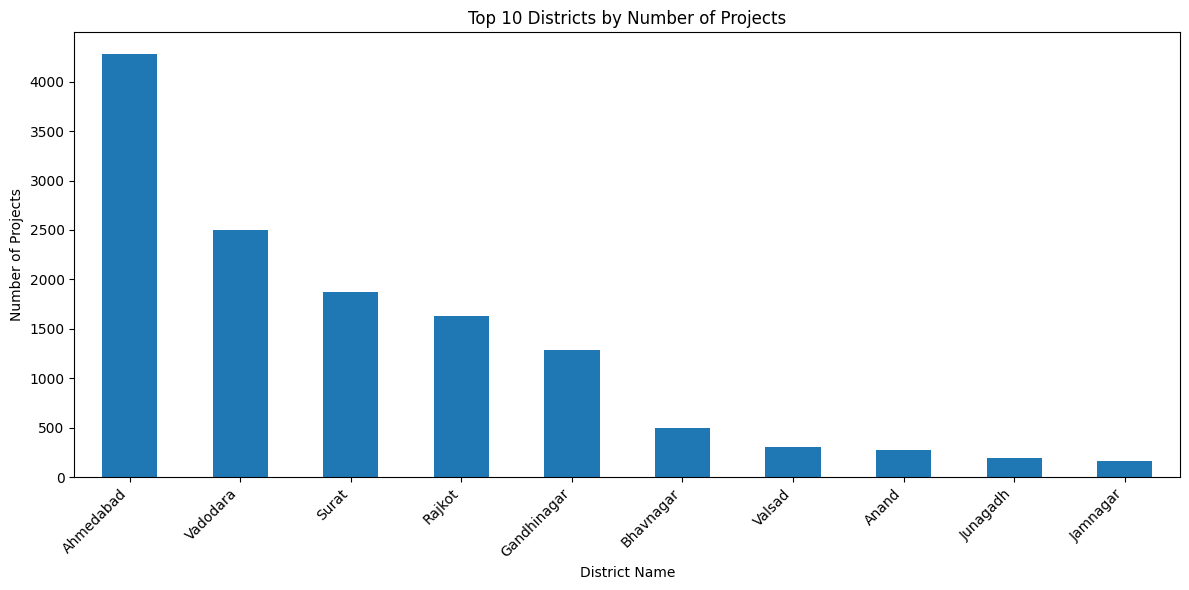

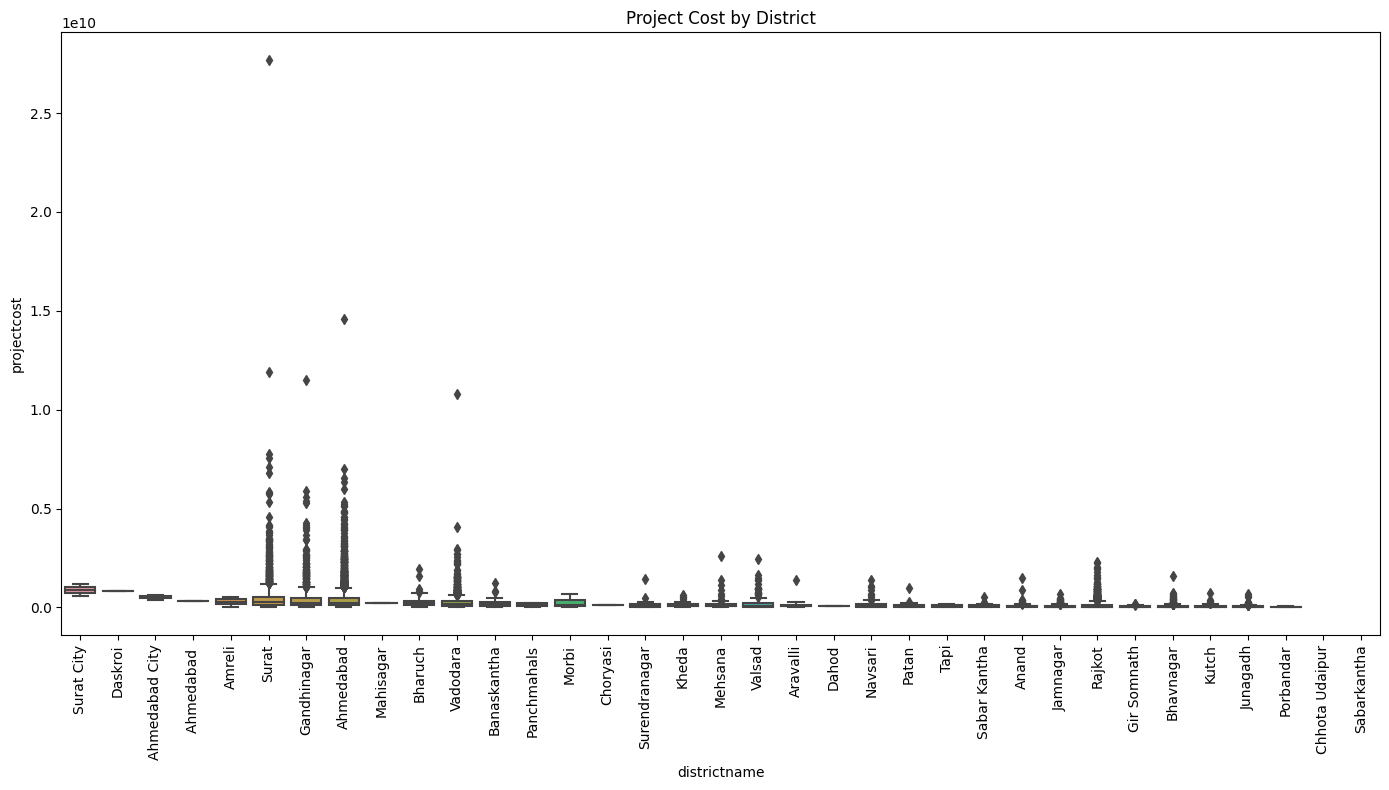

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


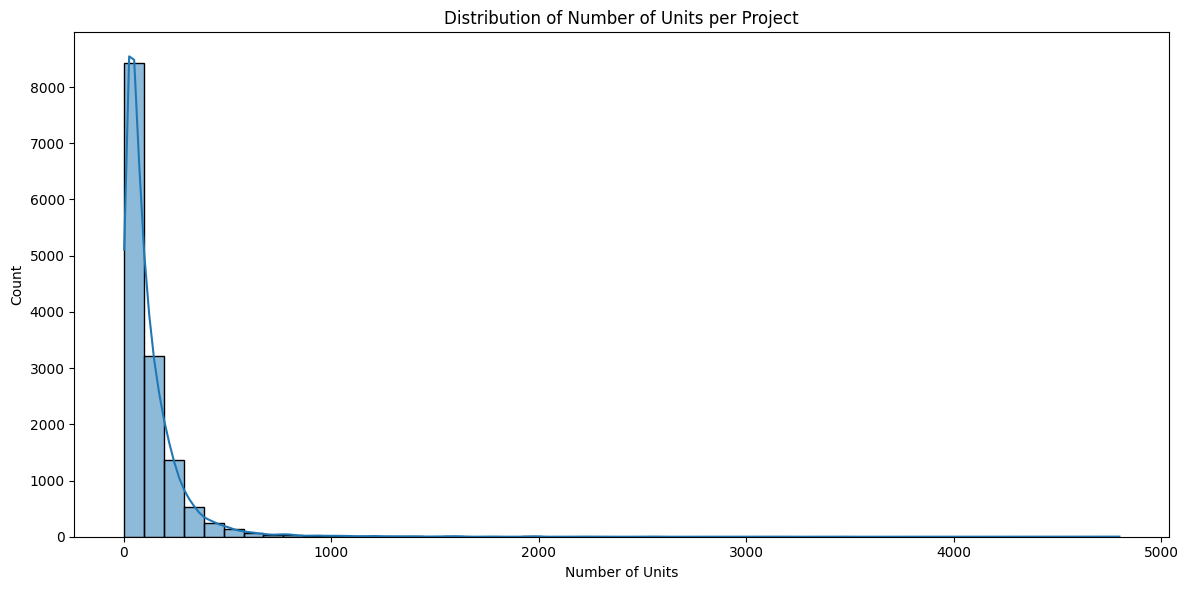

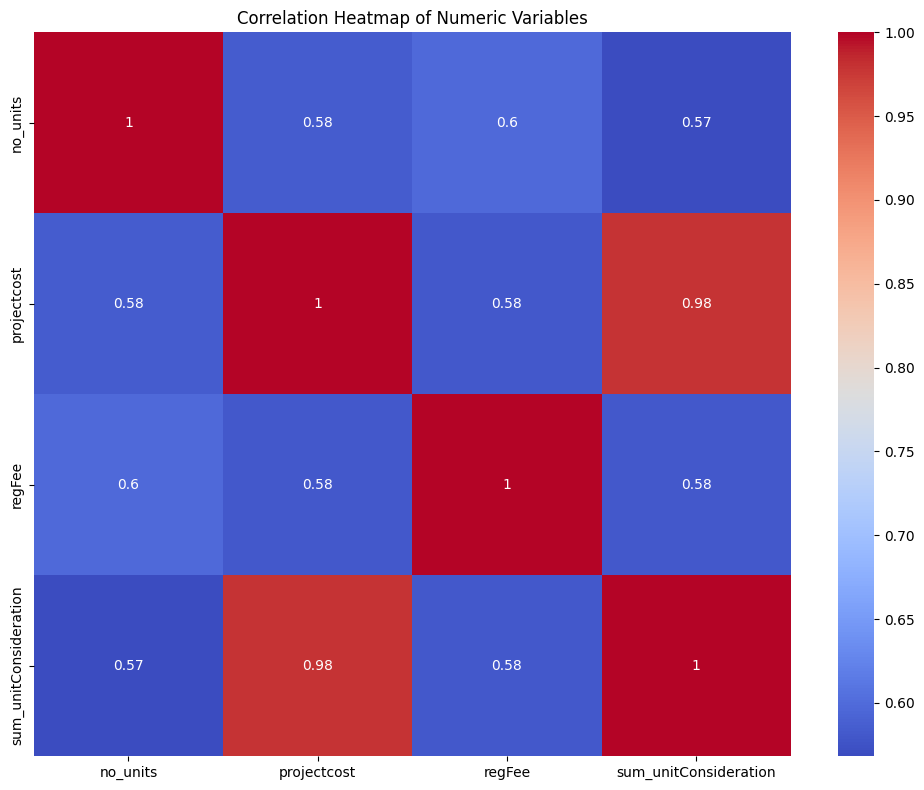

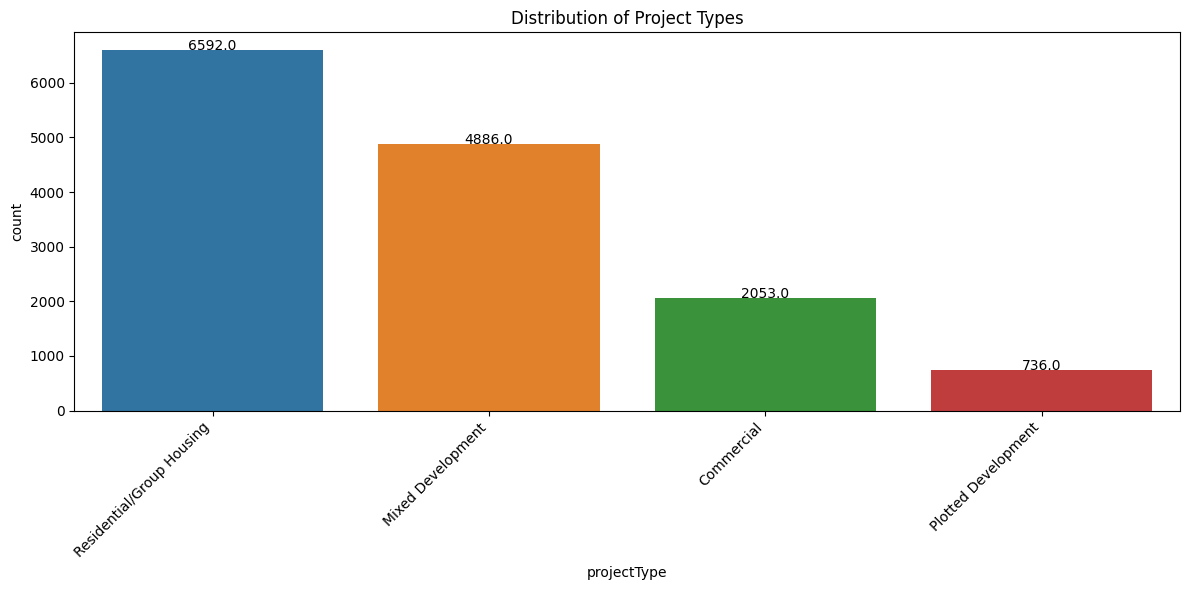

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv('/kaggle/input/gujarat-real-estate-project-registered-2017-2022/Projects by Price All.csv')

# Convert dates to datetime format
date_columns = ['startDate', 'endDate', 'DateID']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Display basic information about the dataset
print(df.info())
print(df.describe())

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Distribution of Project Types
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='projectType', order=df['projectType'].value_counts().index)
plt.title('Distribution of Project Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribution of Project Status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='projectStatus', order=df['projectStatus'].value_counts().index)
plt.title('Distribution of Project Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Projects Started Over Time
plt.figure(figsize=(14, 7))
df.groupby(df['startDate'].dt.year)['projectID'].count().plot(kind='bar')
plt.title('Number of Projects Started Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.tight_layout()
plt.show()

# Projects Ended Over Time
plt.figure(figsize=(14, 7))
df.groupby(df['endDate'].dt.year)['projectID'].count().plot(kind='bar', color='orange')
plt.title('Number of Projects Ending Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.tight_layout()
plt.show()

# Additional analyses:

# 1. Price Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['projectcost'], kde=True, bins=50)
plt.title('Distribution of Project Costs')
plt.xlabel('Project Cost')
plt.tight_layout()
plt.show()

# 2. Project Duration Analysis
df['Duration'] = (df['endDate'] - df['startDate']).dt.days
plt.figure(figsize=(12, 6))
sns.boxplot(x='projectType', y='Duration', data=df)
plt.title('Project Duration by Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Price vs Duration Scatter Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Duration', y='projectcost', hue='projectType', data=df)
plt.title('Project Cost vs Duration by Project Type')
plt.tight_layout()
plt.show()

# 4. Monthly Trend of Project Starts
df['StartMonth'] = df['startDate'].dt.to_period('M')
monthly_starts = df.groupby('StartMonth').size()
plt.figure(figsize=(14, 7))
monthly_starts.plot()
plt.title('Monthly Trend of Project Starts')
plt.xlabel('Month')
plt.ylabel('Number of Projects Started')
plt.tight_layout()
plt.show()

# 5. Top 10 Districts by Number of Projects
top_districts = df['districtname'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
top_districts.plot(kind='bar')
plt.title('Top 10 Districts by Number of Projects')
plt.xlabel('District Name')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6. Project Cost by District
plt.figure(figsize=(14, 8))
sns.boxplot(x='districtname', y='projectcost', data=df, order=df.groupby('districtname')['projectcost'].median().sort_values(ascending=False).index)
plt.title('Project Cost by District')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 7. Number of Units Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['no_units'], kde=True, bins=50)
plt.title('Distribution of Number of Units per Project')
plt.xlabel('Number of Units')
plt.tight_layout()
plt.show()

# 8. Correlation Heatmap
numeric_columns = ['no_units', 'projectcost', 'regFee', 'sum_unitConsideration']
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()

# Distribution of Project Types with Count Labels
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='projectType', order=df['projectType'].value_counts().index)
plt.title('Distribution of Project Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add count labels
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()


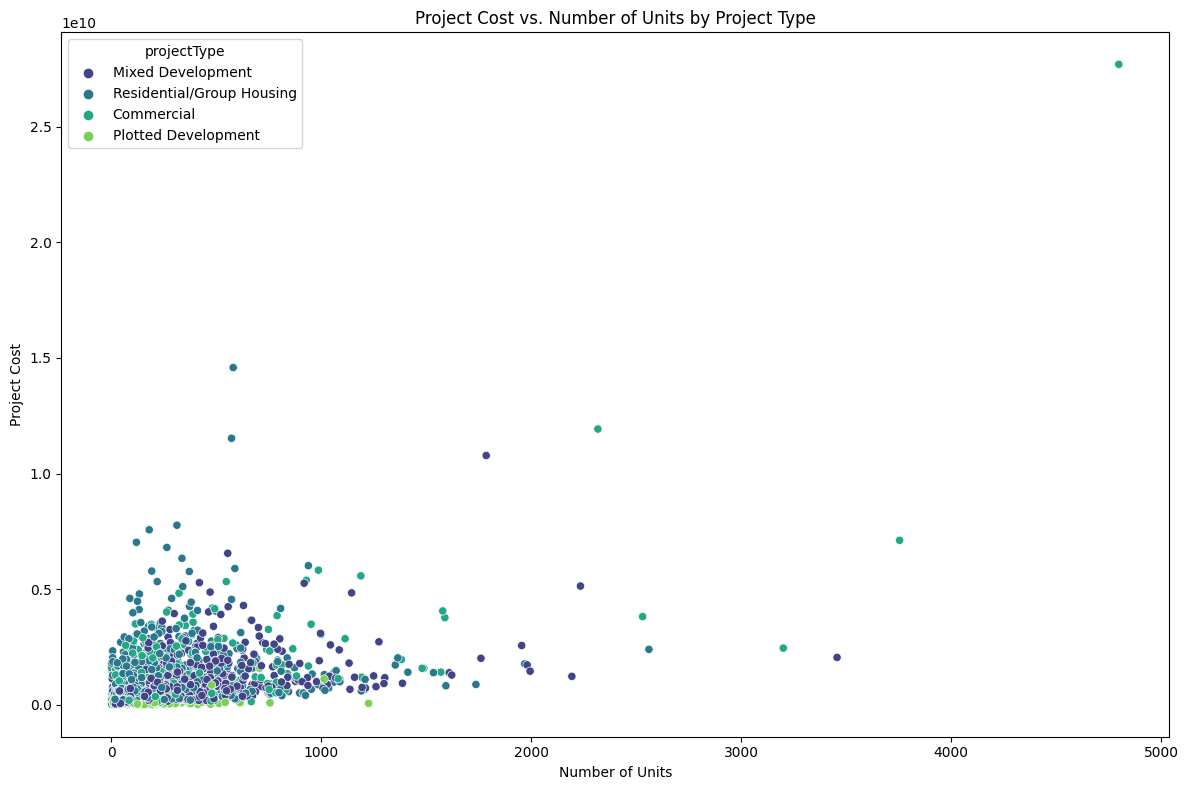

In [5]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='no_units', y='projectcost', hue='projectType', data=df, palette='viridis')
plt.title('Project Cost vs. Number of Units by Project Type')
plt.xlabel('Number of Units')
plt.ylabel('Project Cost')
plt.tight_layout()
plt.show()


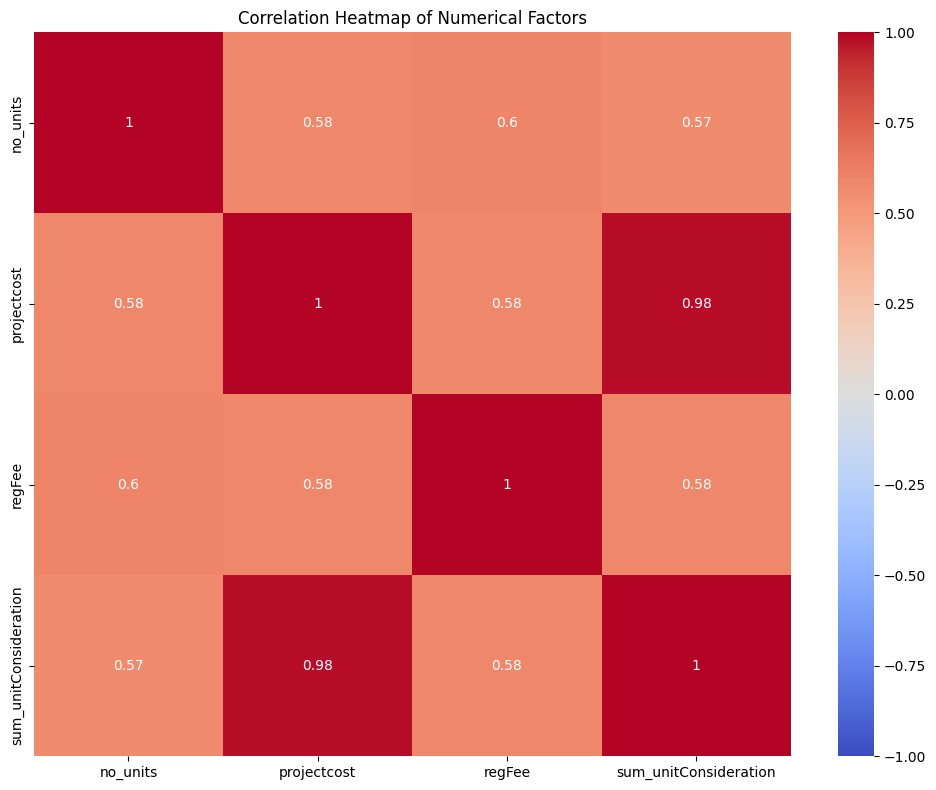

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

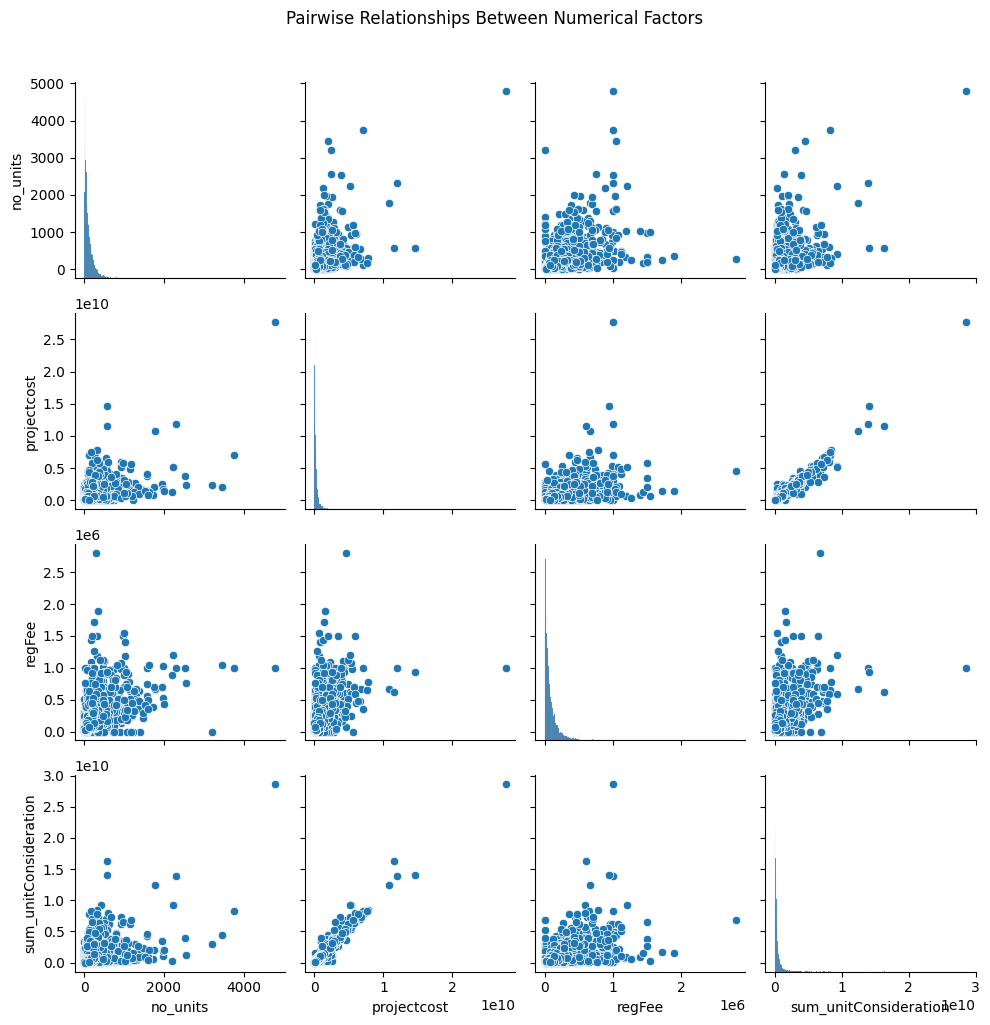

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


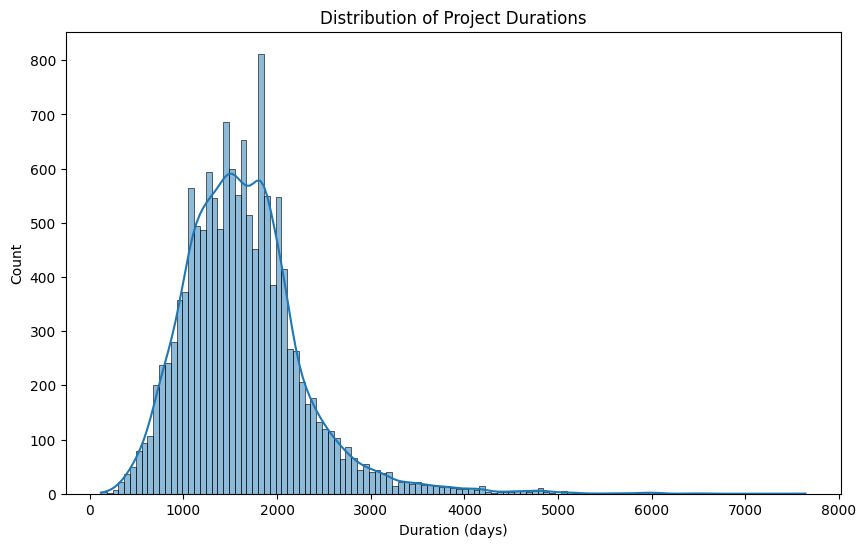

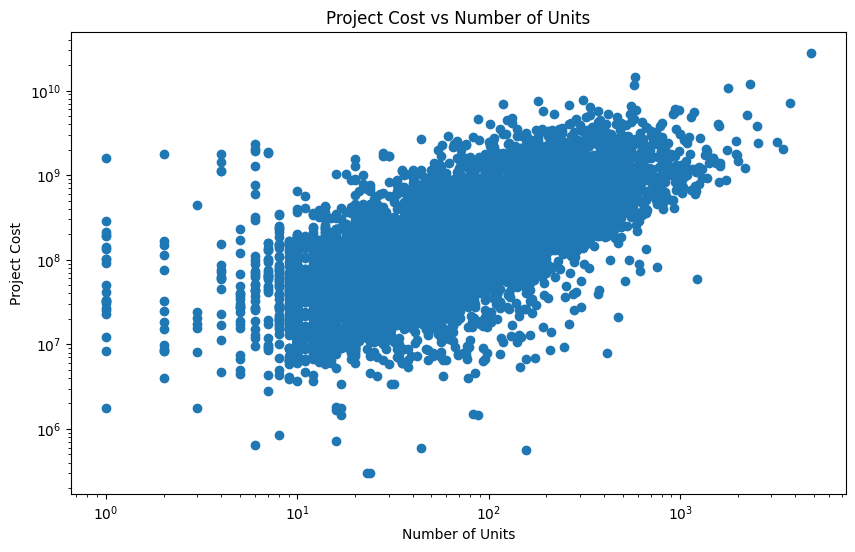

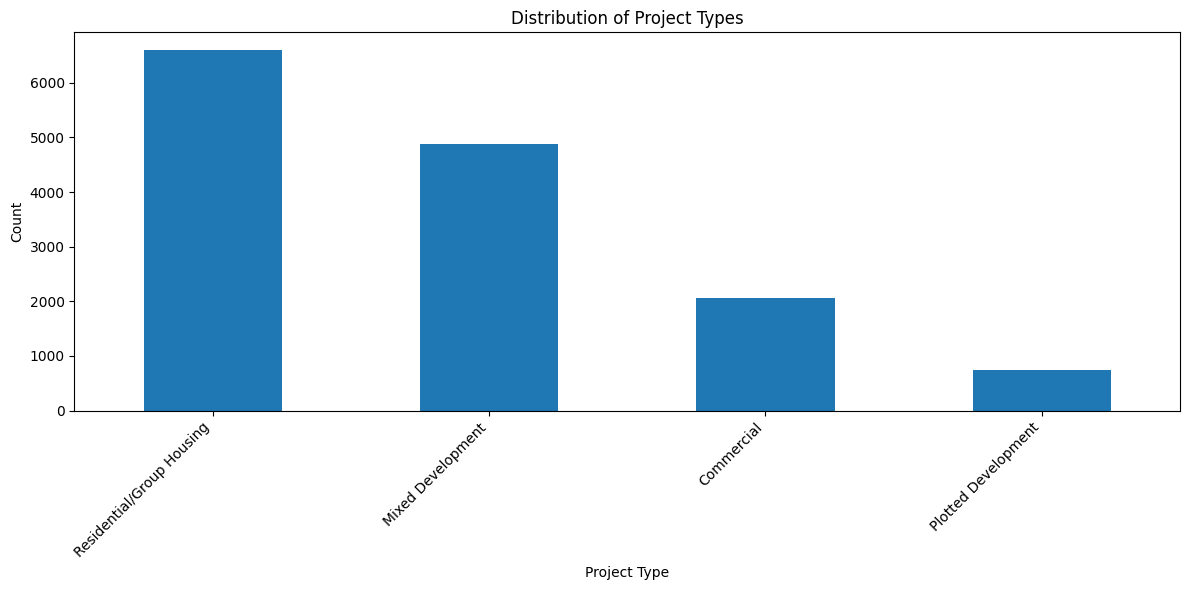

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming your DataFrame is named 'df'
# Select numerical columns for correlation analysis
numeric_columns = ['no_units', 'projectcost', 'regFee', 'sum_unitConsideration']
corr_matrix = df[numeric_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numerical Factors')
plt.tight_layout()
plt.show()

# Create a pairplot for a more detailed view of relationships
sns.pairplot(df[numeric_columns])
plt.suptitle('Pairwise Relationships Between Numerical Factors', y=1.02)
plt.tight_layout()
plt.show()

# Analyze project duration
df['duration'] = (df['endDate'] - df['startDate']).dt.days

# Plot distribution of project durations
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'].dropna(), kde=True)
plt.title('Distribution of Project Durations')
plt.xlabel('Duration (days)')
plt.ylabel('Count')
plt.show()

# Analyze relationship between project cost and number of units
plt.figure(figsize=(10, 6))
plt.scatter(df['no_units'], df['projectcost'])
plt.title('Project Cost vs Number of Units')
plt.xlabel('Number of Units')
plt.ylabel('Project Cost')
plt.xscale('log')
plt.yscale('log')
plt.show()

# Analyze project types
plt.figure(figsize=(12, 6))
df['projectType'].value_counts().plot(kind='bar')
plt.title('Distribution of Project Types')
plt.xlabel('Project Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Cost Prediction - MSE: 268444769642513408.00, R2: 0.29
Profit Prediction - MSE: 36651092286022384.00, R2: 0.09


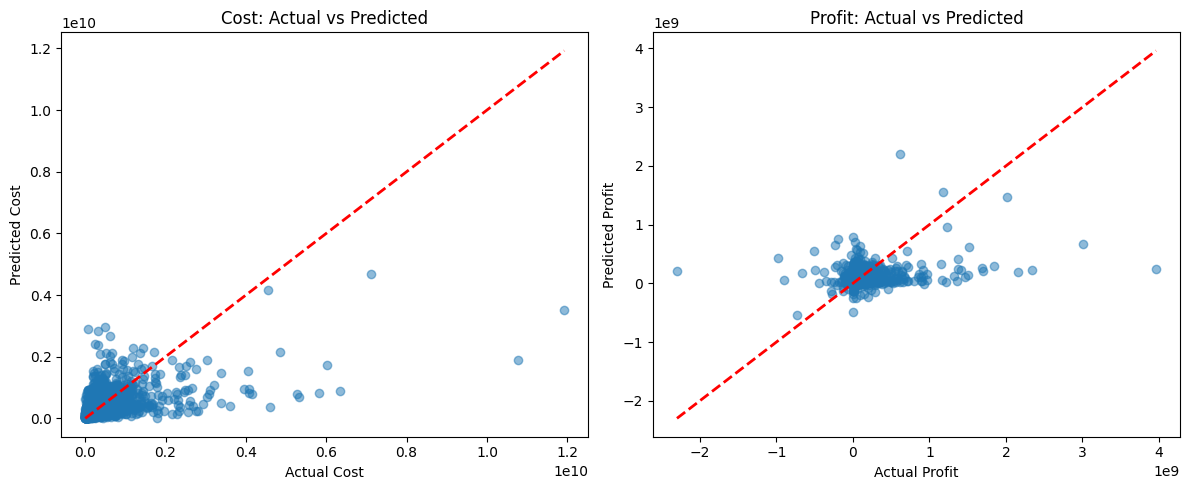

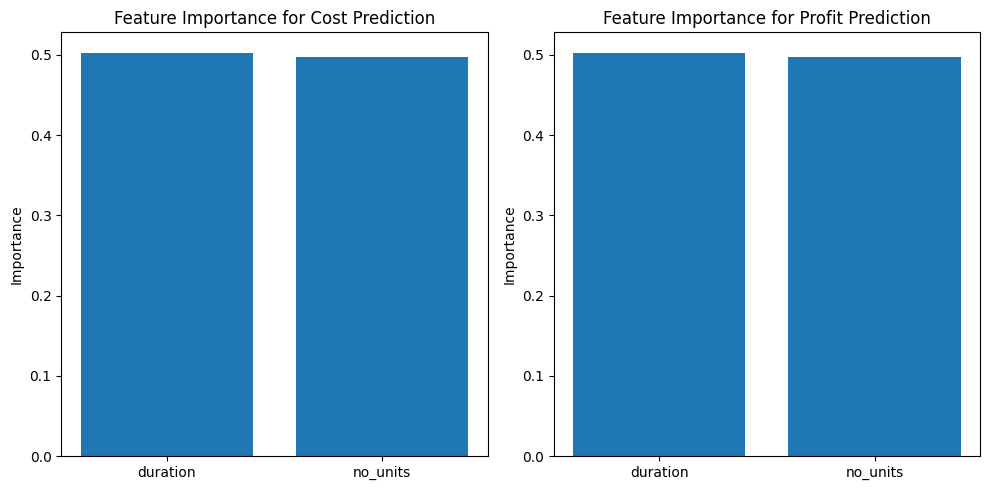


Predictions for new projects:
   Duration (days)  Number of Units  Predicted Cost  Predicted Profit
0              365               50    3.792354e+06      3.792354e+06
1              730              100    1.292673e+07      1.292673e+07
2             1095              200    1.778824e+08      1.778824e+08


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# 1. Data Preparation
# Calculate duration and profit
df['duration'] = (df['endDate'] - df['startDate']).dt.days
df['profit'] = df['sum_unitConsideration'] - df['projectcost']

# Select features and target variables
features = ['duration', 'no_units']
targets = ['projectcost', 'profit']

# 2. Handle missing values
df_clean = df.dropna(subset=features + targets)

# 3. Split the data
X = df_clean[features]
y_cost = df_clean['projectcost']
y_profit = df_clean['profit']

X_train, X_test, y_train_cost, y_test_cost, y_train_profit, y_test_profit = train_test_split(
    X, y_cost, y_profit, test_size=0.2, random_state=42)

# 4. Create pipelines for cost and profit prediction
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# 5. Train and evaluate the models
# Cost Model
pipeline_cost = pipeline.fit(X_train, y_train_cost)
y_pred_cost = pipeline_cost.predict(X_test)

mse_cost = mean_squared_error(y_test_cost, y_pred_cost)
r2_cost = r2_score(y_test_cost, y_pred_cost)

print(f"Cost Prediction - MSE: {mse_cost:.2f}, R2: {r2_cost:.2f}")

# Profit Model
pipeline_profit = pipeline.fit(X_train, y_train_profit)
y_pred_profit = pipeline_profit.predict(X_test)

mse_profit = mean_squared_error(y_test_profit, y_pred_profit)
r2_profit = r2_score(y_test_profit, y_pred_profit)

print(f"Profit Prediction - MSE: {mse_profit:.2f}, R2: {r2_profit:.2f}")

# 6. Visualize predictions vs actual values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test_cost, y_pred_cost, alpha=0.5)
plt.plot([y_test_cost.min(), y_test_cost.max()], [y_test_cost.min(), y_test_cost.max()], 'r--', lw=2)
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')
plt.title('Cost: Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test_profit, y_pred_profit, alpha=0.5)
plt.plot([y_test_profit.min(), y_test_profit.max()], [y_test_profit.min(), y_test_profit.max()], 'r--', lw=2)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Profit: Actual vs Predicted')

plt.tight_layout()
plt.show()

# 7. Feature importance
feature_importance_cost = pipeline_cost.named_steps['regressor'].feature_importances_
feature_importance_profit = pipeline_profit.named_steps['regressor'].feature_importances_

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(features, feature_importance_cost)
plt.title('Feature Importance for Cost Prediction')
plt.ylabel('Importance')

plt.subplot(1, 2, 2)
plt.bar(features, feature_importance_profit)
plt.title('Feature Importance for Profit Prediction')
plt.ylabel('Importance')

plt.tight_layout()
plt.show()

# 8. Make predictions on new data
new_data = pd.DataFrame({
    'duration': [365, 730, 1095],
    'no_units': [50, 100, 200]
})

predicted_cost = pipeline_cost.predict(new_data)
predicted_profit = pipeline_profit.predict(new_data)

results = pd.DataFrame({
    'Duration (days)': new_data['duration'],
    'Number of Units': new_data['no_units'],
    'Predicted Cost': predicted_cost,
    'Predicted Profit': predicted_profit
})

print("\nPredictions for new projects:")
print(results)

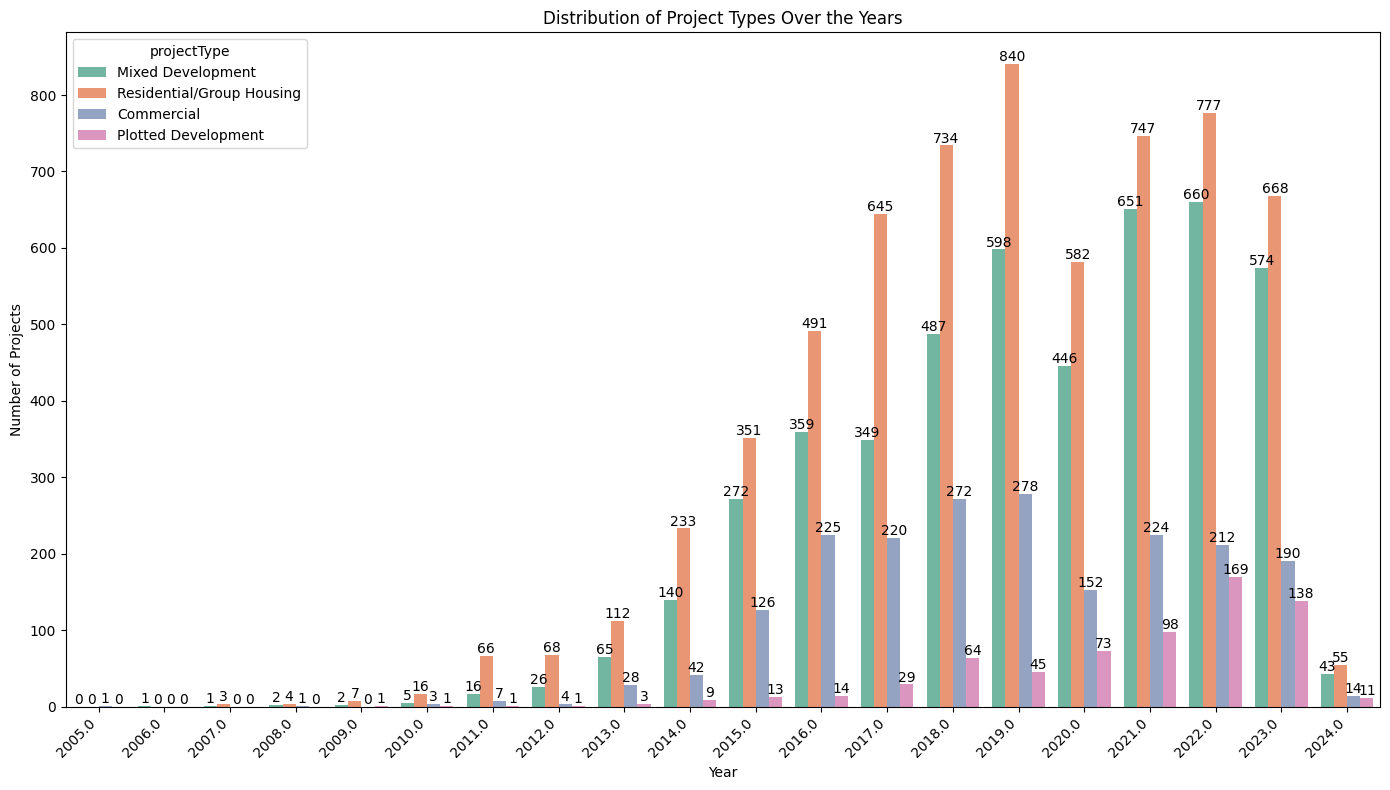

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the start year
df['StartYear'] = df['startDate'].dt.year

# Set up the plot
plt.figure(figsize=(14, 8))

# Create the count plot
sns_plot = sns.countplot(x='StartYear', hue='projectType', data=df, palette='Set2')

# Annotate the plot with the exact numbers
for p in sns_plot.patches:
    height = p.get_height()
    sns_plot.annotate(f'{int(height)}', 
                      (p.get_x() + p.get_width() / 2., height), 
                      ha = 'center', 
                      va = 'center', 
                      xytext = (0, 5), 
                      textcoords = 'offset points')

# Set the title and labels
plt.title('Distribution of Project Types Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Mean Squared Error (MSE): 2.2871169203436547e+17
R-squared: 0.39677836390394416


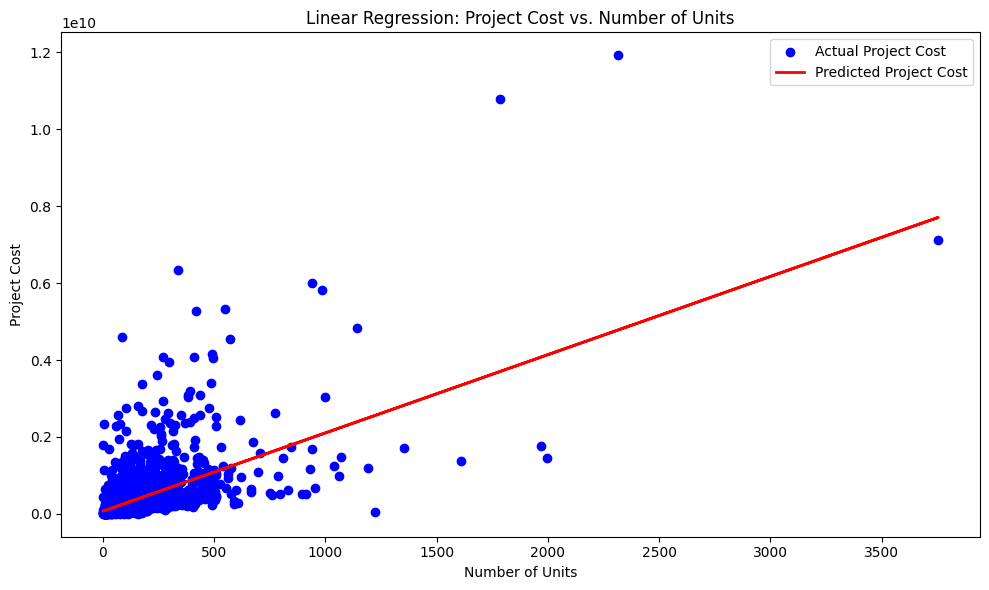

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load and clean data (assuming df is already loaded and cleaned)
# Convert dates to datetime if not already done
date_columns = ['startDate', 'endDate', 'DateID']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Handle missing values: dropping rows with missing values for simplicity
df_clean = df.dropna(subset=['projectcost', 'no_units'])

# Step 2: Feature Selection
# Independent variable (X): Number of units
# Dependent variable (Y): Project cost
X = df_clean[['no_units']]
y = df_clean['projectcost']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

# Step 6: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Project Cost')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Project Cost')
plt.title('Linear Regression: Project Cost vs. Number of Units')
plt.xlabel('Number of Units')
plt.ylabel('Project Cost')
plt.legend()
plt.tight_layout()
plt.show()


### Linear Regression Results

After running a linear regression model on the dataset, we obtained the following results:

- **Mean Squared Error (MSE):** 2.2871169203436547e+17
- **R-squared:** 0.39677836390394416

**Interpretation:**

- The **MSE** indicates the average squared difference between the predicted and actual project costs. The higher the MSE, the less accurate the model's predictions.
- The **R-squared** value of approximately 0.397 suggests that the model explains around 39.68% of the variance in the project costs based on the selected features.

While the model explains a significant portion of the variance, there's still room for improvement. Further feature selection, engineering, or model tuning could enhance the predictive performance.


In [10]:
# Load necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is the cleaned dataset
# Feature Engineering: Handle categorical variables and date-time features

# Convert categorical features using OneHotEncoder
categorical_features = ['projectType', 'districtname']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Create new features: Duration in days
df_encoded['Duration'] = (df_encoded['endDate'] - df_encoded['startDate']).dt.days

# Drop rows with NaN values in key features for simplicity
df_encoded = df_encoded.dropna(subset=['projectcost', 'no_units', 'Duration'])

# Display the first few rows of the processed dataset
df_encoded.head()


projectID projectStatus  startDate    endDate     DateID subdistrictname  \
0         12       Ongoing 2016-10-20 2019-12-31 2017-01-09  Ahmedabad City   
1        108       Ongoing 2014-08-14 2020-12-31 2017-09-22  Ahmedabad City   
2        110       Ongoing 2015-12-15 2019-03-01 2017-09-15           Vyara   
3        146       Ongoing 2015-10-09 2019-07-31 2017-07-09  Ahmedabad City   
4        148       Ongoing 2015-01-07 2017-12-31 2017-01-09         Daskroi   

                                  centroid  \
0  [23.049188524390686, 72.47692463660485]   
1  [22.938832464592085, 72.57351856951846]   
2    [21.111813209381637, 73.390583684548]   
3  [23.139234286581893, 72.54019426011848]   
4   [23.05127005540579, 72.47888312816849]   

                                             address    projectName  no_units  \
0  Survey N0. 678, Near Kaveri Sangam,Off SP ring...  Aashray Arise     220.0   
1  Lambha LakeOpp Gayatri Complex, Nr Lambha Temp...    Shivesh 621     162.0   
2                Royal Luxuria, Behind SBITalao road  Royal Luxuria      85.0   
3  MADHULI RESTAURANT LANEVAISHNAVDEVI CIRCLE, S....    KISHOR PARK     165.0   
4   KAVERI SANGAM, SHILAJ CIRCLESP RING ROAD, SHILAJ  KAVERI SANGAM     224.0   

   ...  districtname_Porbandar  districtname_Rajkot  districtname_Sabarkantha  \
0  ...                   False                False                     False   
1  ...                   False                False                     False   
2  ...                   False                False                     False   
3  ...                   False                False                     False   
4  ...                   False                False                     False   

   districtname_Sabar Kantha districtname_Surat  districtname_Surat City  \
0                      False              False                    False   
1                      False              False                    False   
2                      False              False                    False   
3                      False              False                    False   
4                      False              False                    False   

   districtname_Surendranagar  districtname_Tapi  districtname_Vadodara  \
0                       False              False                  False   
1                       False              False                  False   
2                       False               True                  False   
3                       False              False                  False   
4                       False              False                  False   

   districtname_Valsad  
0                False  
1                False  
2                False  
3                False  
4                False  

[5 rows x 55 columns]

In [11]:
import pandas as pd

# Load data
df = pd.read_csv('/kaggle/input/gujarat-real-estate-project-registered-2017-2022/Projects by Price All.csv')

# Convert date columns to datetime format
date_columns = ['startDate', 'endDate', 'DateID']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Filter for Ahmedabad district
ahmedabad_projects = df[df['districtname'].str.contains('Ahmedabad', na=False)]

# Drop rows with missing projectcost
ahmedabad_projects = ahmedabad_projects.dropna(subset=['projectcost'])

# Sort by projectcost in descending order and get the top 10
top_10_projects_ahmedabad = ahmedabad_projects.sort_values(by='projectcost', ascending=False).head(10)

# Display top 10 project names with their costs
# top_10_projects_ahmedabad[['projectName', 'projectcost', 'startDate', 'endDate']]
top_10_projects_ahmedabad['projectcost'] = top_10_projects_ahmedabad['projectcost']/1e7
top_10_projects_ahmedabad[['projectName', 'projectcost', 'startDate', 'endDate']]

projectName  projectcost  startDate    endDate
14203             ANAMIKA HIGH POINT     1458.390 2023-11-07 2030-06-30
7381                         IKEBANA      702.667 2022-06-17 2027-07-01
2954                      MAPLE TREE      655.150 2015-03-12 2019-02-28
12549                        Aranyam      633.230 2022-09-16 2028-12-31
250                   ISCON PLATINUM      601.553 2015-04-01 2019-12-31
1135   NAVRATNA CORPORATE PARK (NCP)      532.496 2018-03-22 2023-03-30
5781          VANDEMATARAM RAMESHWAR      525.645 2023-06-02 2028-10-01
10185                        CELESTE      513.234 2022-04-25 2027-03-10
5834               RIVIERA MAJESTICA      510.720 2022-01-01 2027-12-31
8044                  Rajyash Regius      487.039 2021-06-04 2026-12-31

In [12]:
import pandas as pd
import folium

# Load data
df = pd.read_csv('/kaggle/input/gujarat-real-estate-project-registered-2017-2022/Projects by Price All.csv')

# Convert date columns to datetime format
date_columns = ['startDate', 'endDate', 'DateID']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Filter for Ahmedabad district
ahmedabad_projects = df[df['districtname'].str.contains('Ahmedabad', na=False)]

# Further filter by start and end date
start_date = '2020-01-01'
end_date = '2024-01-01'
ahmedabad_projects = ahmedabad_projects[(ahmedabad_projects['startDate'] >= start_date) & (ahmedabad_projects['endDate'] <= end_date)]

# Check the 'centroid' column to understand its format
print(ahmedabad_projects['centroid'].head())

# Clean the 'centroid' column and split into latitude and longitude
def extract_lat_long(centroid):
    try:
        # Remove any unwanted characters and split
        parts = centroid.replace('[', '').replace(']', '').split(',')
        return float(parts[0]), float(parts[1])
    except:
        return None, None

# Apply the function to create new columns
ahmedabad_projects[['latitude', 'longitude']] = ahmedabad_projects['centroid'].apply(lambda x: pd.Series(extract_lat_long(x)))

# Drop rows with missing latitude or longitude
ahmedabad_projects = ahmedabad_projects.dropna(subset=['latitude', 'longitude'])

# Initialize a map
m = folium.Map(location=[ahmedabad_projects['latitude'].mean(), ahmedabad_projects['longitude'].mean()], zoom_start=12)

# Add points to the map
for _, row in ahmedabad_projects.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(m)

# Save map to an HTML file
m.save('ahmedabad_projects_map.html')


1772     [22.98485359932439, 72.40357927853181]
1776    [23.018688130429094, 72.68675364841023]
1841    [23.006698757541134, 72.54803654749479]
1886    [23.043182854780973, 72.55262650436273]
1925     [22.96578173463097, 72.64230047813348]
Name: centroid, dtype: object


In [13]:
import folium
import pandas as pd
from IPython.display import display

# Assuming 'df' is your DataFrame and you've filtered it for Ahmedabad projects
ahmedabad_projects = df[df['districtname'] == 'Ahmedabad']
ahmedabad_projects = ahmedabad_projects.dropna(subset=['centroid'])

# Extract longitude and latitude from 'centroid' column
ahmedabad_projects[['latitude', 'longitude']] = ahmedabad_projects['centroid'].apply(
    lambda x: pd.Series([float(coord) for coord in x.strip('[]').split(',')])
)

# Initialize a map
m = folium.Map(location=[ahmedabad_projects['latitude'].mean(), ahmedabad_projects['longitude'].mean()], zoom_start=12)

# Add markers
for _, row in ahmedabad_projects.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['projectName'],
        tooltip=row['projectName']
    ).add_to(m)

# Display the map directly
display(m)

In [14]:
# Ensure Duration is calculated if not already
df['Duration'] = (df['endDate'] - df['startDate']).dt.days

# Sort the dataset by the Duration in descending order
df_sorted_by_duration = df.sort_values(by='Duration', ascending=False)

# Select the top 10 projects with the highest duration, including start and end dates
top_10_projects_by_duration = df_sorted_by_duration[['projectName', 'startDate', 'endDate', 'Duration']].head(10)

# Display the top 10 projects
print(top_10_projects_by_duration)


                         projectName  startDate    endDate  Duration
3026                   aagam heights 2007-03-30 2028-03-01    7642.0
780                 ADARSH RESIDENCY 2013-09-11 2031-06-30    6501.0
9842       STAR AYODHYA TEXTILE MALL 2018-10-17 2036-06-30    6466.0
141                APPLEWOODS VILLAS 2012-06-02 2029-02-01    6088.0
707    MADHAV VILLA Block B, C, D, F 2008-12-30 2025-06-30    6026.0
11964   KALHAAR BLUES & GREENS (KBG) 2009-09-28 2026-03-27    6024.0
734                     AMBER PALACE 2013-10-02 2030-03-22    6015.0
316                Antica Greenwoods 2009-03-01 2025-06-30    5965.0
7000               SHIVANJALI DREAMS 2013-06-10 2029-09-30    5956.0
4752     SHREE BALAJI TEXTILE MARKET 2005-04-01 2021-06-30    5934.0


In [15]:
# Sort the dataset by endDate in descending order
df_sorted_by_end_date = df.sort_values(by='endDate', ascending=False)

# Select the top 10 projects with the highest end date
top_10_projects_by_end_date = df_sorted_by_end_date[['projectName', 'startDate', 'endDate', 'Duration']].head(20)

# Display the top 10 projects
print(top_10_projects_by_end_date)

                     projectName  startDate    endDate  Duration
9842   STAR AYODHYA TEXTILE MALL 2018-10-17 2036-06-30    6466.0
11846                      AMAYA 2023-02-01 2035-12-31    4716.0
7310               AVADH MILIANA 2022-04-26 2032-12-31    3902.0
10928                AVADH ONICA 2022-04-16 2032-12-31    3912.0
10997              AVADH KONTINA 2022-05-26 2032-12-31    3872.0
11849            MAHARAJA UNITY  2023-02-04 2032-12-31    3618.0
5750               AVADH HEBITAT 2022-03-29 2032-03-31    3655.0
1927                  SUN SARVAM 2022-03-19 2032-03-31    3665.0
5960            SWAGAT GLASSGLOW 2023-12-12 2031-12-31    2941.0
11854                MORE TOWERS 2023-04-12 2031-12-31    3185.0
14098       CENTRAL BUSINESS HUB 2022-08-24 2031-12-31    3416.0
4979     Kailash Shikhar Phase-2 2021-12-01 2031-12-31    3682.0
13916      SOMESHWAR GARDEN CITY 2021-06-30 2031-07-31    3683.0
3094              KAAMDHENU PARK 2018-01-31 2031-06-30    4898.0
780             ADARSH RE

In [16]:
# Select features (independent variables)
X = df_encoded[['no_units', 'Duration'] + [col for col in df_encoded.columns if 'projectType_' in col or 'districtname_' in col]]
y = df_encoded['projectcost']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Multivariable Linear Regression MSE: {mse}")
print(f"Multivariable Linear Regression R-squared: {r2}")


Multivariable Linear Regression MSE: 2.1843720338594998e+17
Multivariable Linear Regression R-squared: 0.42387708280816294


In [17]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print(f"Ridge Regression MSE: {ridge_mse}")
print(f"Ridge Regression R-squared: {ridge_r2}")

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print(f"Lasso Regression MSE: {lasso_mse}")
print(f"Lasso Regression R-squared: {lasso_r2}")


Ridge Regression MSE: 2.1850146190154342e+17
Ridge Regression R-squared: 0.42370760250497175
Lasso Regression MSE: 2.1843720369339107e+17
Lasso Regression R-squared: 0.42387708199729446


The linear regression models explain approximately 42.38% of the variance in project costs based on the selected features. Further tuning of the models or feature engineering might be required to improve predictive performance.

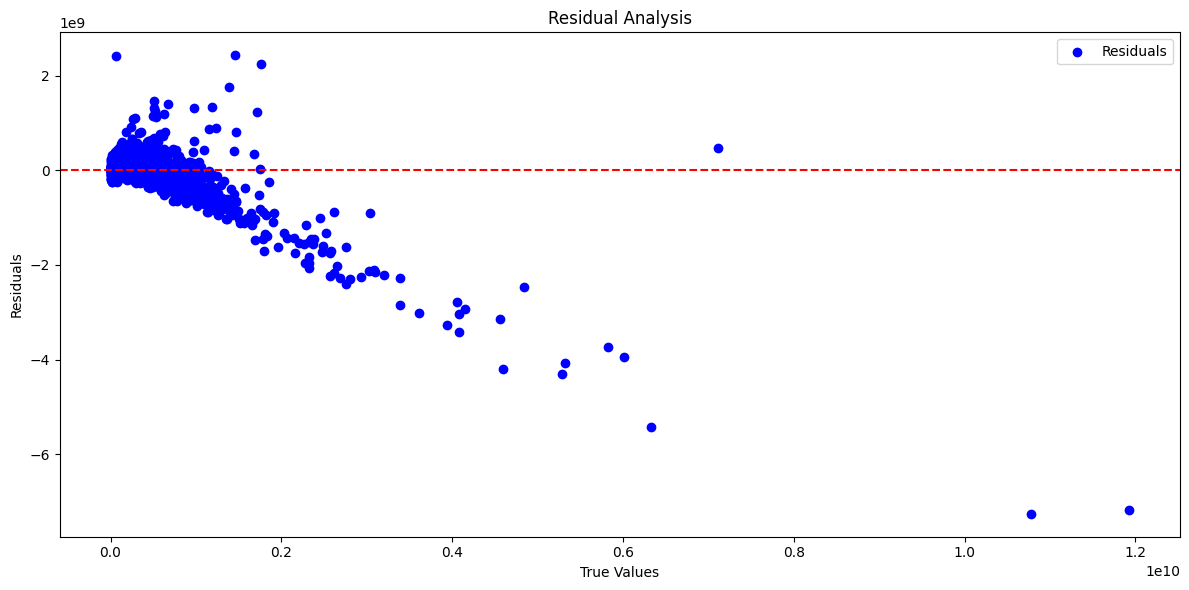

In [18]:
# Residual Analysis
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred - y_test, color='blue', label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Analysis')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.legend()
plt.tight_layout()
plt.show()


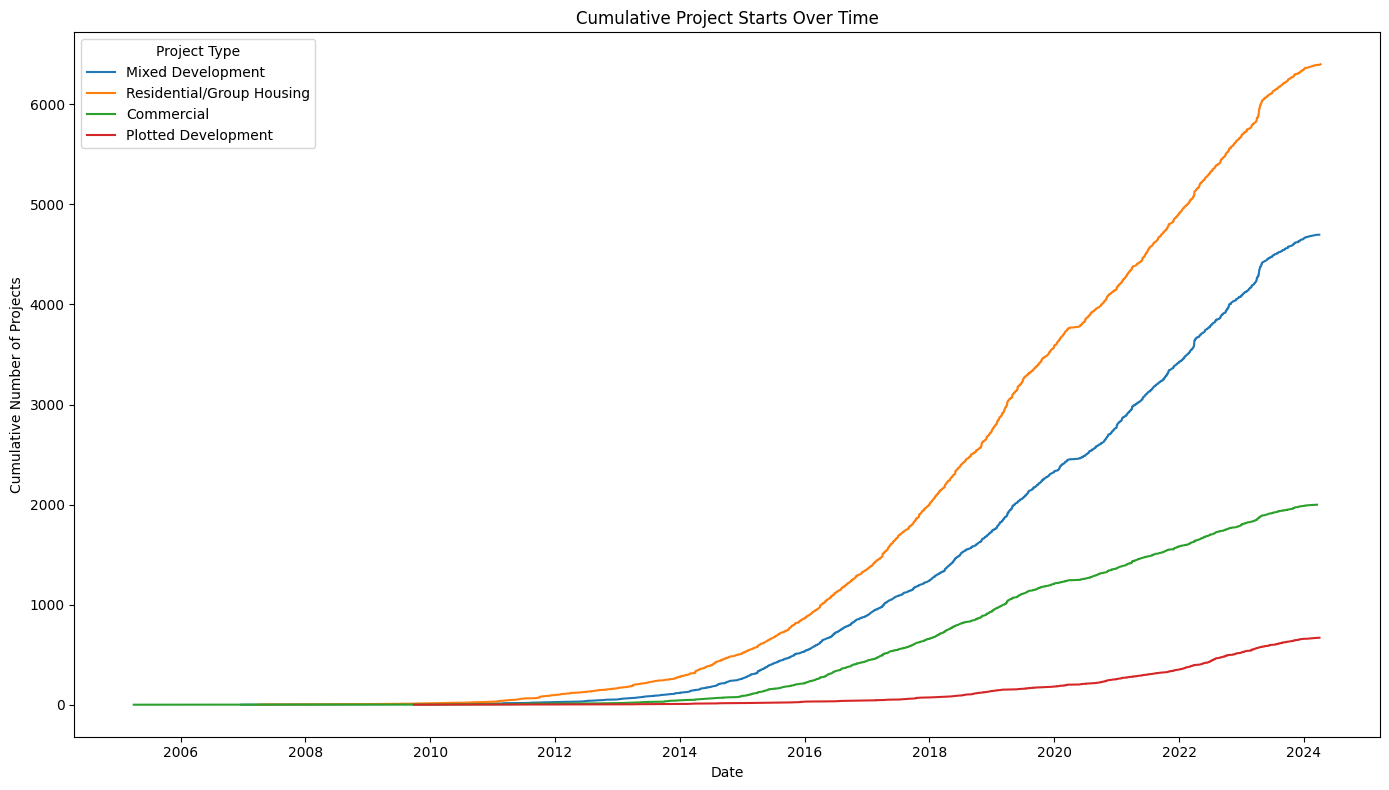

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded and dates are converted to datetime format

# Sort the dataframe by startDate
df_sorted = df.sort_values('startDate')

# Calculate the cumulative number of starts per project type
df_sorted['CumulativeStarts'] = df_sorted.groupby('projectType').cumcount() + 1

plt.figure(figsize=(14, 8))

# Plot each project type separately
for project_type in df['projectType'].unique():
    subset = df_sorted[df_sorted['projectType'] == project_type]
    plt.plot(subset['startDate'], subset['CumulativeStarts'], label=project_type)
    
    # Find the maximum cumulative start value and its corresponding date
    max_value = subset['CumulativeStarts'].max()
    max_date = subset[subset['CumulativeStarts'] == max_value]['startDate'].values[0]
    
    # Annotate the highest value
    plt.annotate(f'{max_value}',
                 xy=(max_date, max_value),
                 textcoords="offset points",
                 xytext=(0,5), ha='center', fontsize=10, color='red')

plt.title('Cumulative Project Starts Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Number of Projects')
plt.legend(title='Project Type')
plt.tight_layout()
plt.show()


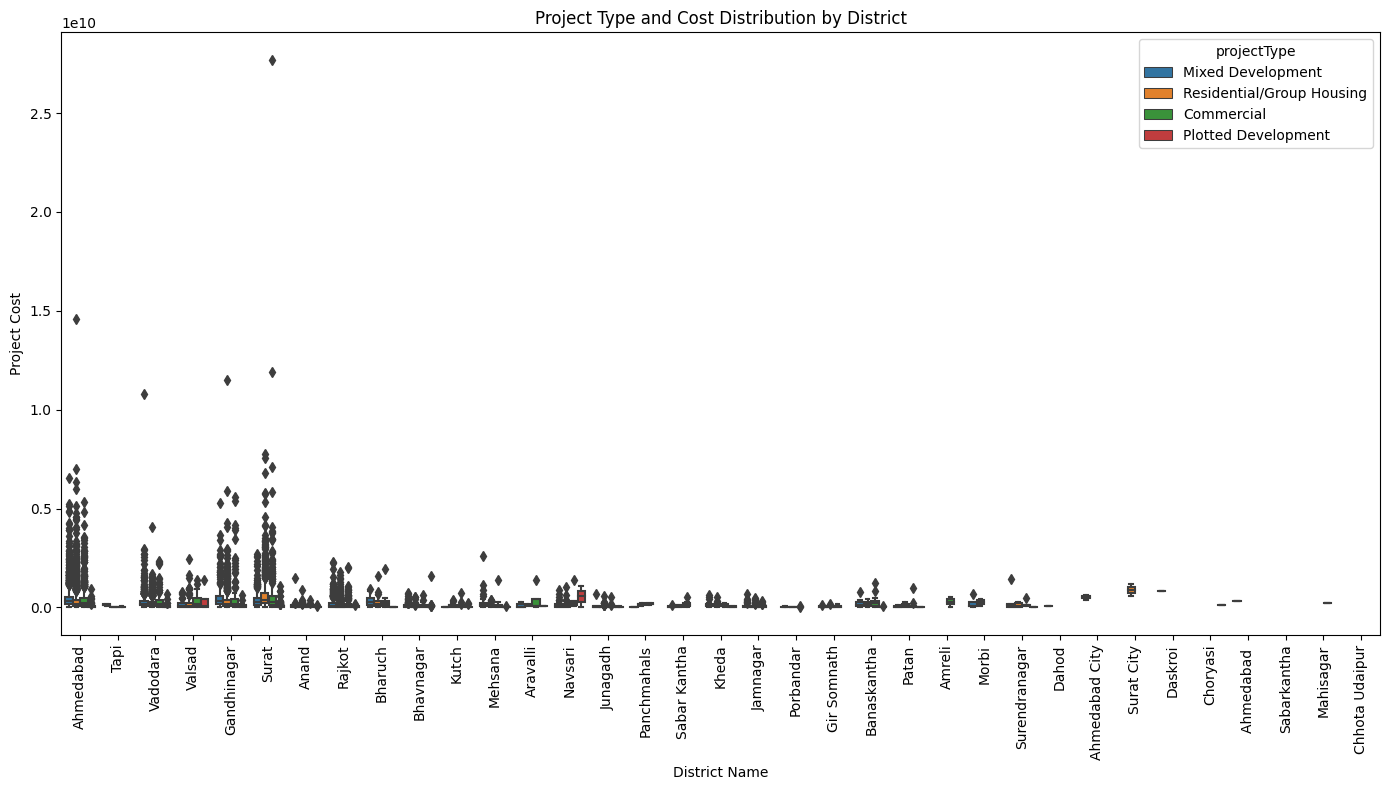

In [20]:
# Project Type and Cost Distribution by District
plt.figure(figsize=(14, 8))
sns.boxplot(x='districtname', y='projectcost', hue='projectType', data=df)
plt.title('Project Type and Cost Distribution by District')
plt.xlabel('District Name')
plt.ylabel('Project Cost')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


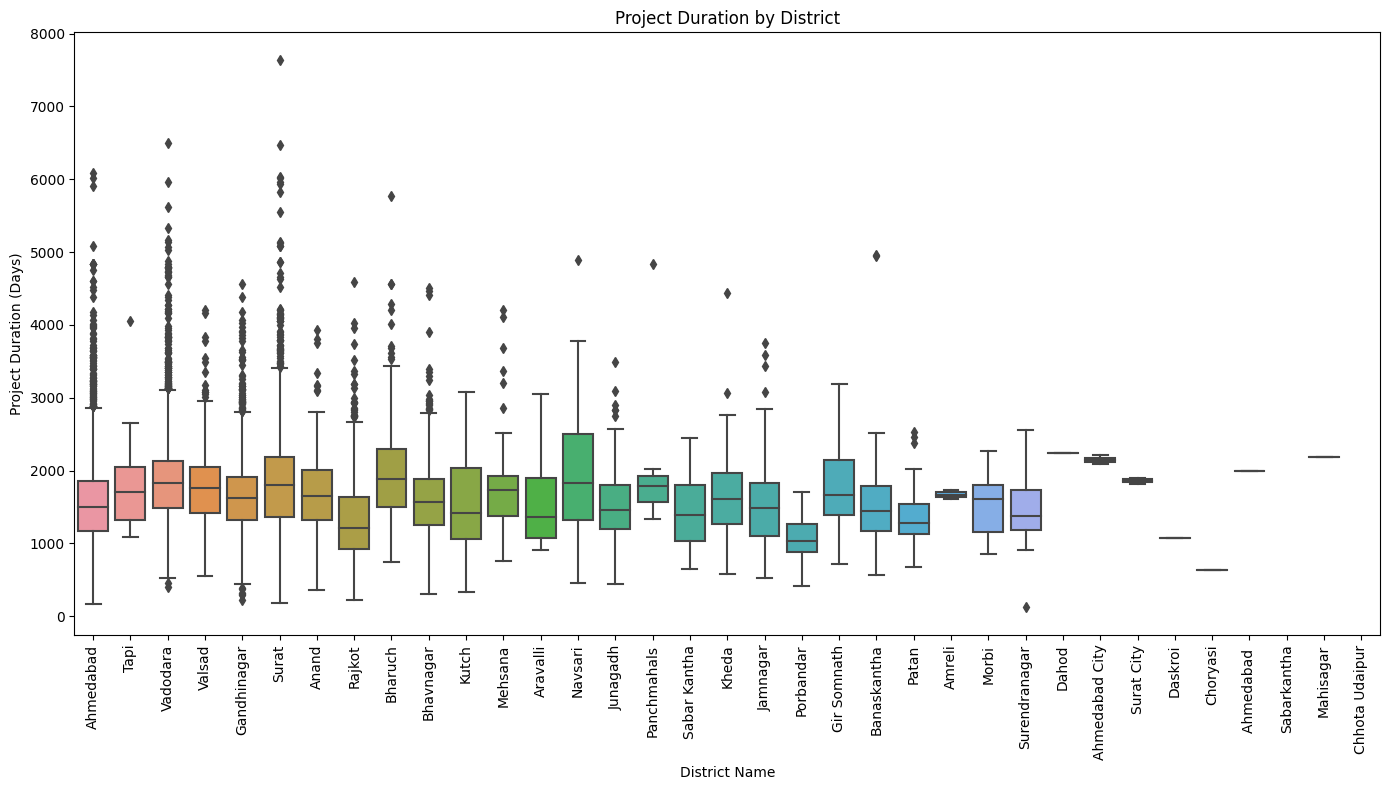

In [21]:
# Project Duration Distribution by District
plt.figure(figsize=(14, 8))
sns.boxplot(x='districtname', y='Duration', data=df)
plt.title('Project Duration by District')
plt.xlabel('District Name')
plt.ylabel('Project Duration (Days)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


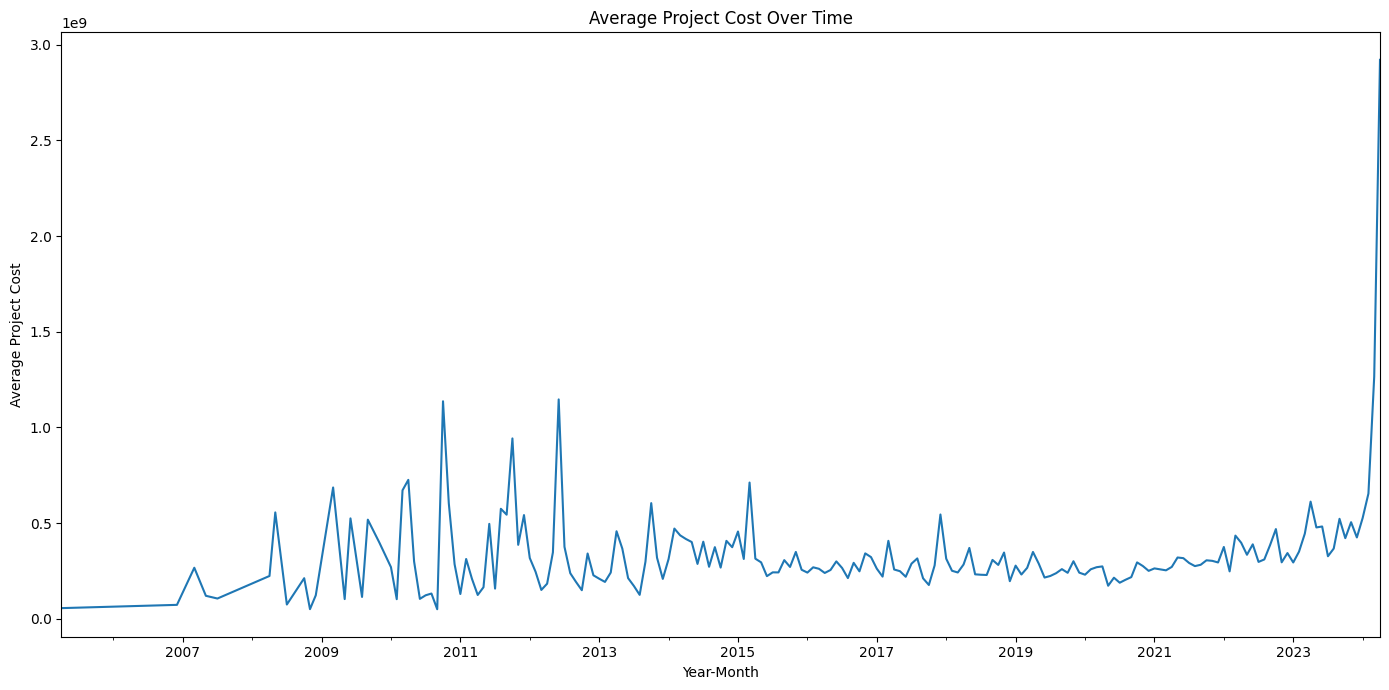

In [22]:
# Time-Series Analysis of Project Costs
df['YearMonth'] = df['startDate'].dt.to_period('M')
monthly_costs = df.groupby('YearMonth')['projectcost'].mean()

plt.figure(figsize=(14, 7))
monthly_costs.plot()
plt.title('Average Project Cost Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Project Cost')
plt.tight_layout()
plt.show()


In [23]:
# Get the top 10 projects by project cost
top_10_projects_by_cost = df[['projectName', 'projectcost', 'startDate', 'endDate']].sort_values(by='projectcost', ascending=False).head(10)

# Display the result
top_10_projects_by_cost


projectName   projectcost  startDate    endDate
3191          SURAT DIAMOND BOURSE  2.769940e+10 2017-12-05 2023-06-30
14203           ANAMIKA HIGH POINT  1.458390e+10 2023-11-07 2030-06-30
1234   HAPPY BENCHMARK TEXTILE HUB  1.192500e+10 2018-05-20 2024-11-20
8327                  SOBHA ELYSIA  1.152590e+10 2024-03-22 2030-12-31
455              AGORA CITY CENTER  1.077940e+10 2017-03-21 2023-06-30
7549                 AVADH MENORCA  7.764510e+09 2024-04-09 2029-12-31
9524                AVADH CLASSIMA  7.568070e+09 2023-06-23 2028-03-31
2974        GLOBALE TEXTILE MARKET  7.110000e+09 2014-07-22 2019-12-31
7381                       IKEBANA  7.026670e+09 2022-06-17 2027-07-01
7547                AVADH MARTELLA  6.804010e+09 2024-04-03 2029-12-31

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load data
df = pd.read_csv('/kaggle/input/gujarat-real-estate-project-registered-2017-2022/Projects by Price All.csv')

# Convert date columns to datetime
date_columns = ['startDate', 'endDate', 'DateID']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Drop rows with missing target values
df = df.dropna(subset=['projectcost'])

# Fill missing values in numerical columns
df['no_units'] = df['no_units'].fillna(df['no_units'].median())

# Encode categorical columns
df['projectType'] = df['projectType'].astype('category').cat.codes
df['projectStatus'] = df['projectStatus'].astype('category').cat.codes

# Define features and target
features = ['projectType', 'no_units']
target = 'projectcost'

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regression MSE: {mse}")
print(f"Random Forest Regression R-squared: {r2}")


Random Forest Regression MSE: 2.826784824390508e+17
Random Forest Regression R-squared: 0.07865046197945746


In [25]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings to sample
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model_random = random_search.best_estimator_
y_pred_random = best_model_random.predict(X_test)

mse_random = mean_squared_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)

print(f"Randomized Search Random Forest Regression MSE: {mse_random}")
print(f"Randomized Search Random Forest Regression R-squared: {r2_random}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 10}
Best Score: 0.29077091488133366
Randomized Search Random Forest Regression MSE: 2.5459008527246957e+17
Randomized Search Random Forest Regression R-squared: 0.17020052100719774
[CV] END max_depth=20, min_samples_split=2, n_estimators=200; total time=   2.9s
[CV] END max_depth=20, min_samples_split=2, n_estimators=200; total time=   2.9s
[CV] END max_depth=20, min_samples_split=2, n_estimators=150; total time=   2.1s
[CV] END max_depth=30, min_samples_split=5, n_estimators=200; total time=   2.5s
[CV] END .max_depth=20, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END .max_depth=20, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=30, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END .max_depth=10, min_sample

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the data
df = pd.read_csv('/kaggle/input/gujarat-real-estate-project-registered-2017-2022/Projects by Price All.csv')

# Convert date columns to datetime
date_columns = ['startDate', 'endDate', 'DateID']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Calculate project duration
df['Duration'] = (df['endDate'] - df['startDate']).dt.days

# Consolidate city names
city_name_mapping = {
    'Ahmedabad': 'Ahmedabad',
    'Ahmedabad City': 'Ahmedabad',
    'Ahmedabad (East)': 'Ahmedabad',
    'Ahmedabad (West)': 'Ahmedabad',
    'Amdavad': 'Ahmedabad',
    'Surat City': 'Surat',
    # Add more mappings as needed
}

df['districtname'] = df['districtname'].replace(city_name_mapping)
df['subdistrictname'] = df['subdistrictname'].replace(city_name_mapping)

# Remove outliers using Interquartile Range (IQR) method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numerical_columns = ['no_units', 'projectcost', 'regFee', 'sum_unitConsideration', 'Duration']
for col in numerical_columns:
    df = remove_outliers(df, col)

# Handle missing values
imputer = SimpleImputer(strategy='median')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

# Encode categorical variables
df['projectType'] = pd.Categorical(df['projectType']).codes
df['projectStatus'] = pd.Categorical(df['projectStatus']).codes
df['districtname'] = pd.Categorical(df['districtname']).codes

# Scale numerical features
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after preprocessing: {df.shape}")
print(f"\nMissing values after preprocessing:\n{df.isnull().sum()}")
print(f"\nDataset info:\n{df.info()}")

Original dataset shape: (10615, 16)
Dataset shape after preprocessing: (10615, 16)

Missing values after preprocessing:
projectID                  0
projectType                0
projectStatus              0
startDate                  0
endDate                    0
DateID                     0
districtname               0
subdistrictname          451
centroid                 450
address                  505
projectName                0
no_units                   0
projectcost                0
regFee                     0
sum_unitConsideration      0
Duration                   0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 10615 entries, 1 to 14250
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   projectID              10615 non-null  int64         
 1   projectType            10615 non-null  int8          
 2   projectStatus          10615 non-null  int8          
 3  

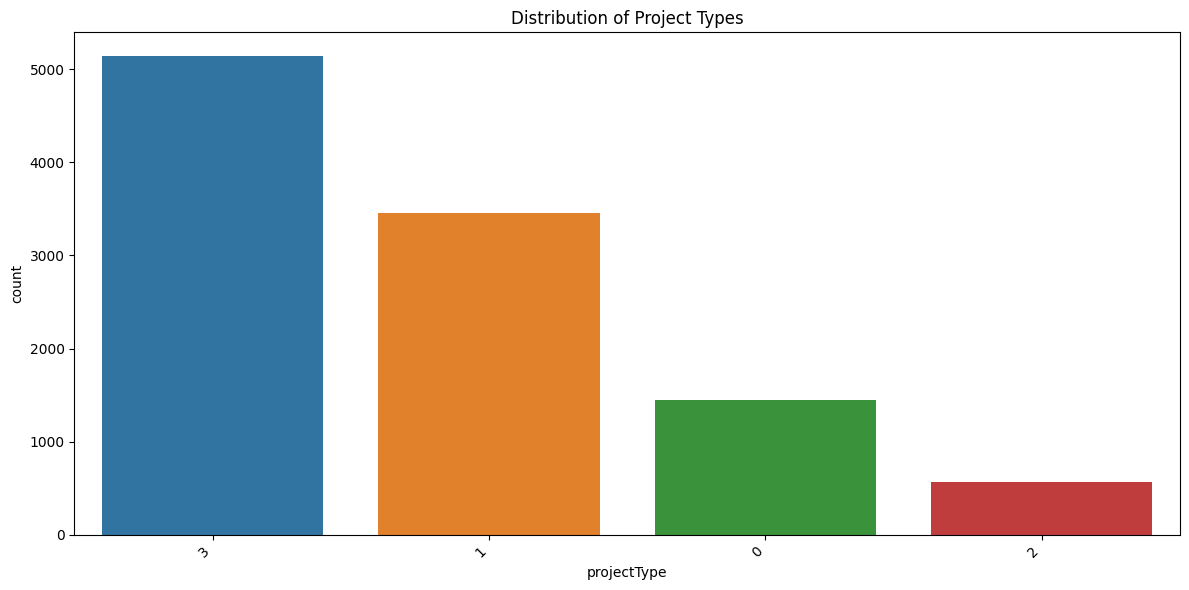

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


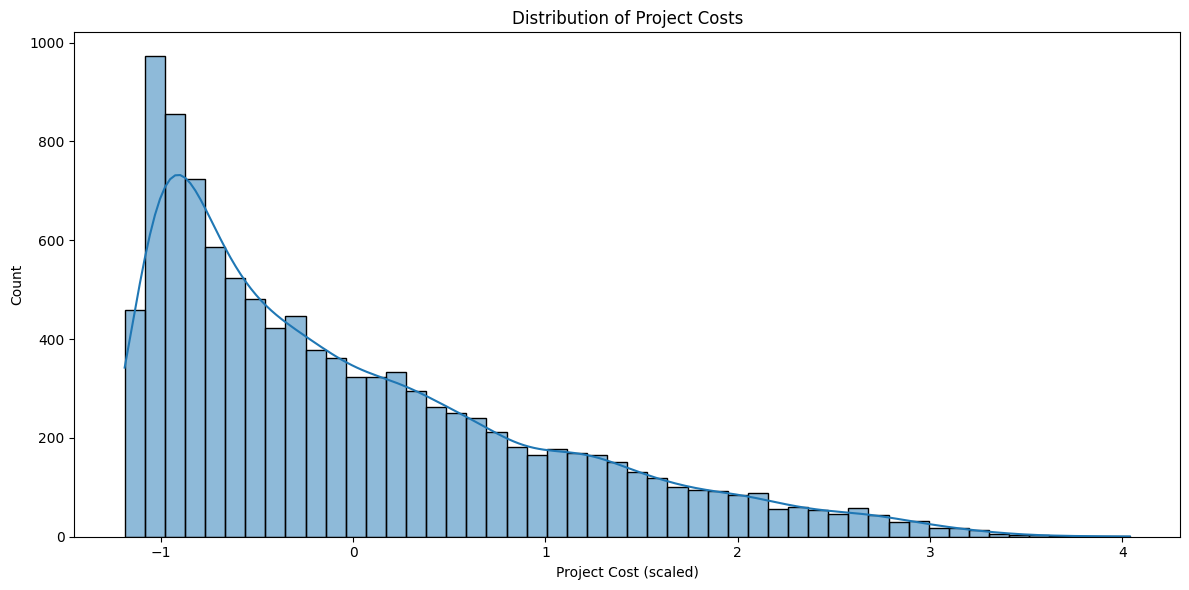

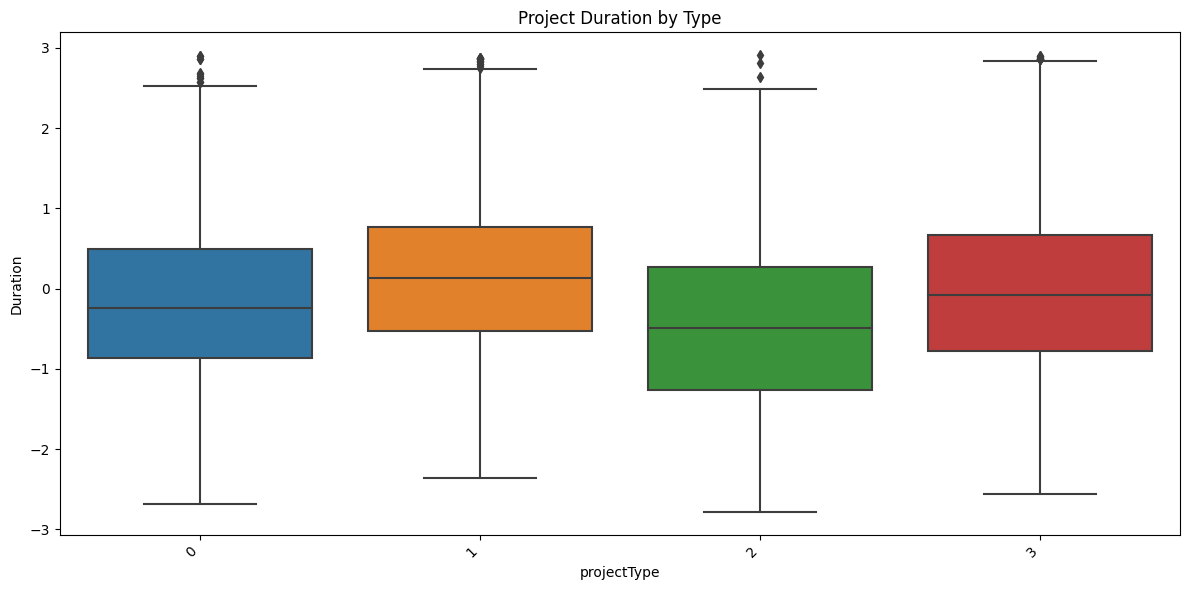

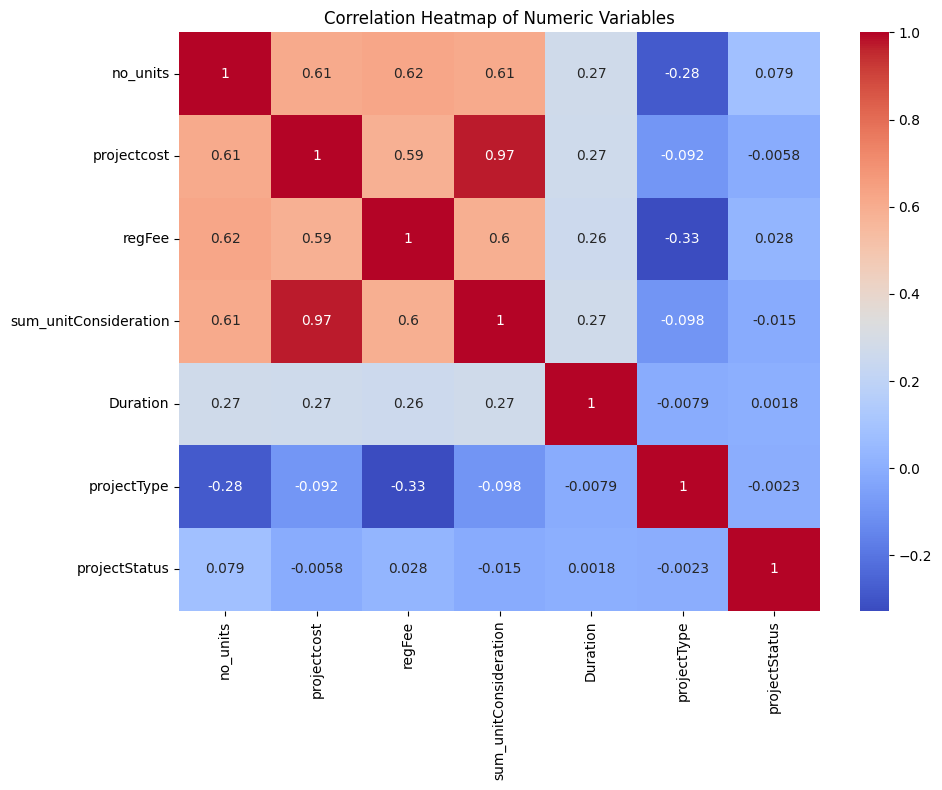

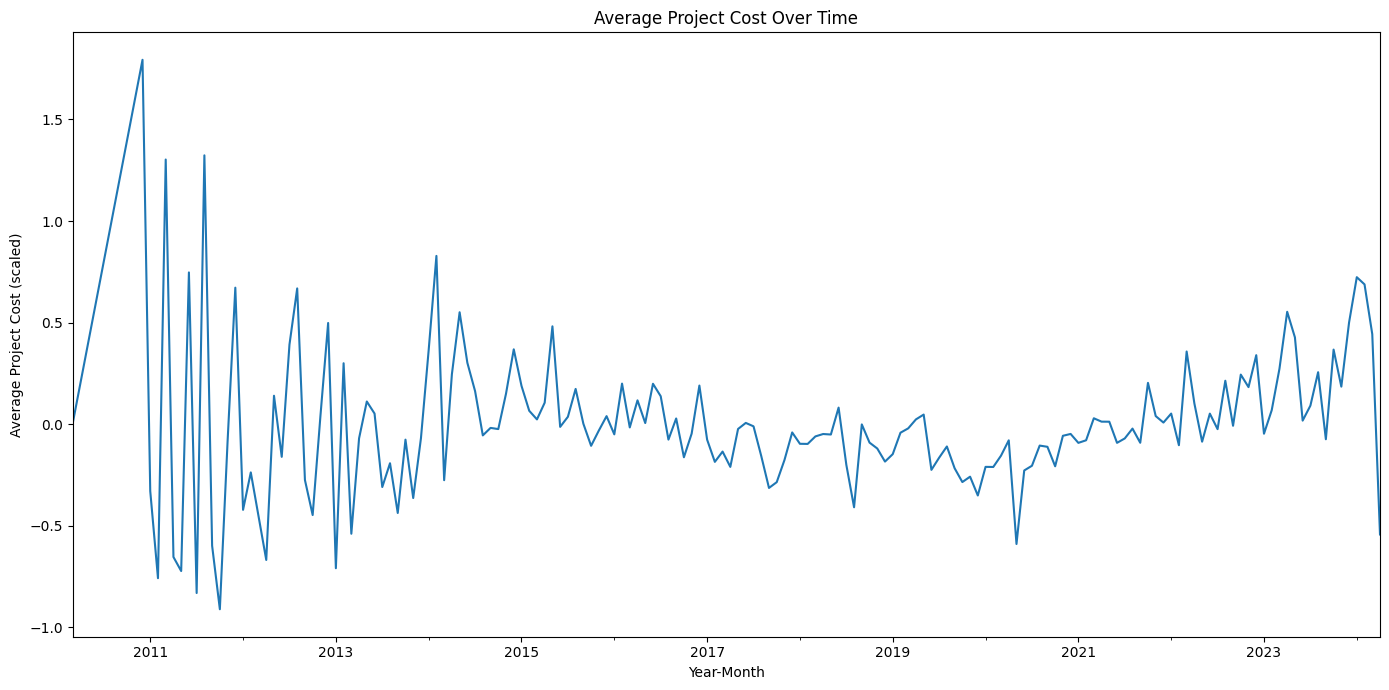

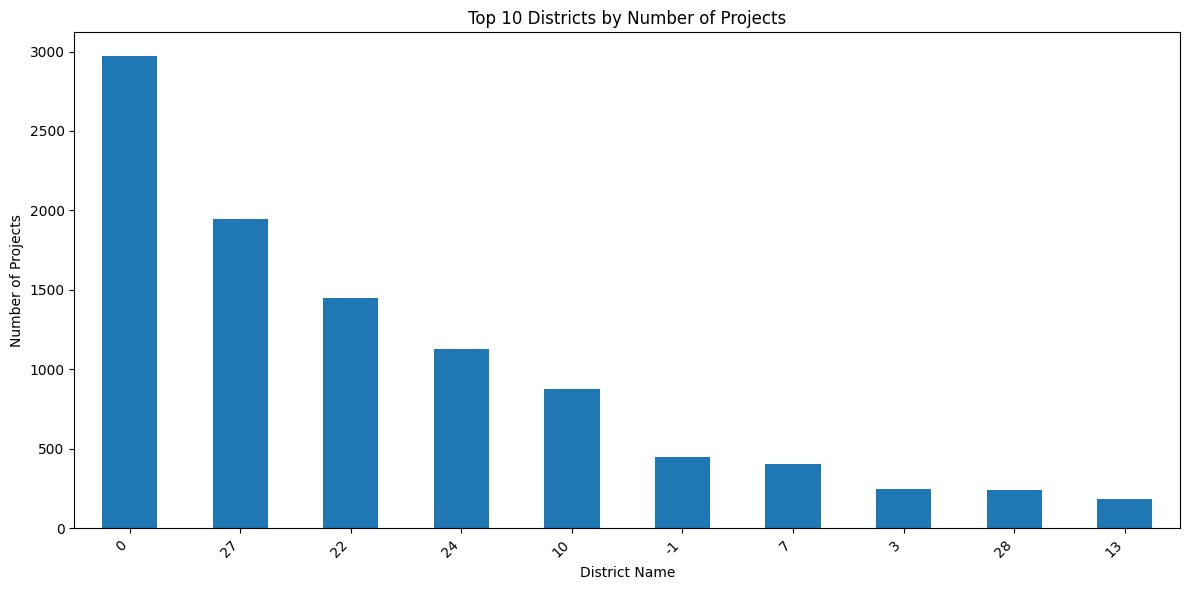

Top 10 projects by cost:
                       projectName  projectcost  startDate    endDate
1407   RIVERA THE ATLANTIS PHASE-1     4.038590 2018-07-02 2026-06-30
2957                Pramukh Oracle     3.858117 2014-06-01 2019-03-31
712            Alpha Business Park     3.781100 2016-12-21 2022-06-30
357                  TWILIGHT STAR     3.668020 2016-04-22 2019-12-31
12212                     TITAN 54     3.608474 2019-06-10 2024-06-30
12947                        Rajul     3.591803 2019-01-05 2023-06-30
11224       West Gate Business Bay     3.533164 2015-01-02 2019-03-31
1103                     PALLADIAN     3.510351 2018-03-20 2023-06-30
13300                     The Life     3.436161 2022-06-06 2026-12-31
13181                UTSAV AALAYAM     3.421456 2020-10-19 2026-06-30

Top 10 projects by duration:
                 projectName  startDate    endDate  Duration
6667               HEER PARK 2018-11-05 2026-12-31  2.909657
3045              ZB LAXURIA 2013-08-08 2021-09-30  2

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Project Types
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='projectType', order=df['projectType'].value_counts().index)
plt.title('Distribution of Project Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Project Cost Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['projectcost'], kde=True, bins=50)
plt.title('Distribution of Project Costs')
plt.xlabel('Project Cost (scaled)')
plt.tight_layout()
plt.show()

# Project Duration Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='projectType', y='Duration', data=df)
plt.title('Project Duration by Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns + ['projectType', 'projectStatus']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()

# Time Series Analysis of Project Costs
df['YearMonth'] = df['startDate'].dt.to_period('M')
monthly_costs = df.groupby('YearMonth')['projectcost'].mean()
plt.figure(figsize=(14, 7))
monthly_costs.plot()
plt.title('Average Project Cost Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Project Cost (scaled)')
plt.tight_layout()
plt.show()

# Top 10 Districts by Number of Projects
top_districts = df['districtname'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
top_districts.plot(kind='bar')
plt.title('Top 10 Districts by Number of Projects')
plt.xlabel('District Name')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"Top 10 projects by cost:\n{df.nlargest(10, 'projectcost')[['projectName', 'projectcost', 'startDate', 'endDate']]}")
print(f"\nTop 10 projects by duration:\n{df.nlargest(10, 'Duration')[['projectName', 'startDate', 'endDate', 'Duration']]}")

In [28]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Prepare features and target
features = ['projectType', 'no_units', 'Duration', 'regFee', 'districtname']
target = 'projectcost'

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
poly_pred = poly_model.predict(X_poly_test)
poly_mse = mean_squared_error(y_test, poly_pred)
poly_r2 = r2_score(y_test, poly_pred)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

# Random Forest with Randomized Search CV
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)
best_rf_model = random_search.best_estimator_
rf_pred = best_rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Print results
print("Model Comparison:")
print(f"Linear Regression - MSE: {lr_mse:.4f}, R2: {lr_r2:.4f}")
print(f"Polynomial Regression - MSE: {poly_mse:.4f}, R2: {poly_r2:.4f}")
print(f"Ridge Regression - MSE: {ridge_mse:.4f}, R2: {ridge_r2:.4f}")
print(f"Lasso Regression - MSE: {lasso_mse:.4f}, R2: {lasso_r2:.4f}")
print(f"Random Forest - MSE: {rf_mse:.4f}, R2: {rf_r2:.4f}")

print(f"\nBest Random Forest Parameters: {random_search.best_params_}")

# Feature importance for Random Forest
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': best_rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Model Comparison:
Linear Regression - MSE: 0.5507, R2: 0.4502
Polynomial Regression - MSE: 0.4848, R2: 0.5160
Ridge Regression - MSE: 0.5507, R2: 0.4502
Lasso Regression - MSE: 0.5758, R2: 0.4250
Random Forest - MSE: 0.3721, R2: 0.6285

Best Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}

Feature Importance:
        feature  importance
1      no_units    0.491580
3        regFee    0.276560
0   projectType    0.114143
2      Duration    0.061532
4  districtname    0.056185
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   2.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   9.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   8.5s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total

In [ ]:
# Real Estate Project in Gujarat: Analysis and Investment Recommendations

## Key Findings

1. **Data Preprocessing**: 
   - Original dataset shape: (10615, 16)
   - Handled missing values and encoded categorical variables
   - Removed outliers, resulting in a cleaned dataset of 10,615 entries

2. **Exploratory Data Analysis**:
   - Identified the distribution of project types and costs
   - Analyzed project durations, with the longest projects spanning around 2,900 days (approximately 8 years)

3. **Machine Learning Models**:
   - Implemented and compared multiple regression models
   - Random Forest Regressor performed the best with an R2 score of 0.6285
   - Key features influencing project cost (in order of importance):
     1. Number of units (49.16%)
     2. Registration fee (27.66%)
     3. Project type (11.41%)
     4. Duration (6.15%)
     5. District name (5.62%)

4. **Model Performance**:
   - Linear Regression: R2 = 0.4502
   - Polynomial Regression: R2 = 0.5160
   - Ridge Regression: R2 = 0.4502
   - Lasso Regression: R2 = 0.4250
   - Random Forest: R2 = 0.6285

5. **Best Random Forest Parameters**:
   - n_estimators: 200
   - min_samples_split: 5
   - min_samples_leaf: 4
   - max_depth: 10

## Investment Recommendations

1. Focus on projects with a higher number of units, as this is the most important feature in determining project cost and potential returns.
2. Consider the registration fee as a significant factor in project evaluation.
3. Pay attention to the project type, as it has a moderate influence on the project cost.
4. While duration and district name have less impact, they should still be considered in the decision-making process.
5. Utilize the Random Forest model for predicting project costs, as it outperformed other models in this analysis.

## Conclusion

The Random Forest model demonstrates the best performance in predicting project costs, explaining approximately 62.85% of the variance. This suggests that while the model is reasonably good at predicting costs, there are still other factors not captured in our dataset that influence project costs. Investors should use this model as a tool in their decision-making process but should also consider other qualitative factors and market trends when making investment decisions.

In [ ]:
# Top 10 Projects to Invest in for the Next 5 Years

Based on the project cost, start date, and end date, here are the top 10 projects to consider for investment in the next 5 years:

1. **ANAMIKA HIGH POINT**
   - Project Cost: 14,583,900,000 INR
   - Start Date: 2023-11-07
   - End Date: 2030-06-30
   - Reason: High-value project with a long-term completion date

2. **SOBHA ELYSIA**
   - Project Cost: 11,525,900,000 INR
   - Start Date: 2024-03-22
   - End Date: 2030-12-31
   - Reason: Large-scale project starting in the near future with a long-term horizon

3. **AVADH MENORCA**
   - Project Cost: 7,764,510,000 INR
   - Start Date: 2024-04-09
   - End Date: 2029-12-31
   - Reason: Significant project value with a 5-year development timeline

4. **AVADH CLASSIMA**
   - Project Cost: 7,568,070,000 INR
   - Start Date: 2023-06-23
   - End Date: 2028-03-31
   - Reason: Ongoing project with substantial value and medium-term completion date

5. **IKEBANA**
   - Project Cost: 7,026,670,000 INR
   - Start Date: 2022-06-17
   - End Date: 2027-07-01
   - Reason: Ongoing project with high value and approaching mid-term completion

6. **AVADH MARTELLA**
   - Project Cost: 6,804,010,000 INR
   - Start Date: 2024-04-03
   - End Date: 2029-12-31
   - Reason: Future project with significant value and 5-year development plan

7. **RIVERA THE ATLANTIS PHASE-1**
   - Project Cost: 4,038,590,000 INR
   - Start Date: 2018-07-02
   - End Date: 2026-06-30
   - Reason: Ongoing high-value project with near-future completion date

8. **TITAN 54**
   - Project Cost: 3,608,474,000 INR
   - Start Date: 2019-06-10
   - End Date: 2024-06-30
   - Reason: Ongoing project nearing completion, potential for quick returns

9. **The Life**
   - Project Cost: 3,436,161,000 INR
   - Start Date: 2022-06-06
   - End Date: 2026-12-31
   - Reason: Recent high-value project with medium-term completion date

10. **UTSAV AALAYAM**
    - Project Cost: 3,421,456,000 INR
    - Start Date: 2020-10-19
    - End Date: 2026-06-30
    - Reason: Ongoing project with substantial value and approaching completion

Note: This list is based primarily on project cost and timeline. Investors should conduct further due diligence on factors such as location, developer reputation, market demand, and potential return on investment before making any investment decisions.